In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-v0_8-colorblind')

from src.utils.ds_formatter import format_all
from src.dataset import *
plt.rcParams['figure.dpi'] = 40
OLD_F_METADATA = "./data/HT_Sensor_metadata.dat"
F_METADATA = "./data/HT_Sensor_metadata_new.dat"
OLD_F_DATASET = "./data/HT_Sensor_dataset.dat"
F_DATASET = "./data/HT_Sensor_dataset_new.dat"

## Analisis de metadatos

Text(0, 0.5, '')

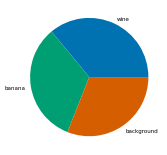

In [2]:
metadata = pd.read_csv(F_METADATA, sep=",")
ax = metadata["class"].value_counts().plot(kind="pie")
ax.set_ylabel('')

In [3]:
md_mean = metadata['dt'].mean()
md_std = metadata['dt'].std()
print(f'ventana dt:\n\tMedia: {md_mean}\n\tDesv.Std.: {md_std}')

ventana dt:
	Media: 0.7515999999999999
	Desv.Std.: 0.42842374944779743


## Analisis de Dataset definitivo

In [15]:
# Indicar en la flag si se recalcula o se usa el fichero ya hecho
df = get_dataset(build_dataset=False, time_window=5, margin=10)
df.head()

R1  R1_mean   R1_dev       R2  R2_mean   R2_dev       R3  R3_mean  \
0  13.0032  10.5307  10.6073  11.8487  13.6880  13.5634  8.36834  9.05264   
1  13.0032  10.5306  10.6072  11.8487  13.6874  13.5631  8.36833  9.05268   
2  13.0032  10.5304  10.6071  11.8483  13.6872  13.5629  8.36832  9.05256   
3  13.0032  10.5303  10.6067  11.8477  13.6871  13.5624  8.36816  9.05244   
4  13.0031  10.5301  10.6065  11.8471  13.6866  13.5620  8.36816  9.05234   

    R3_dev       R4  ...        R8   R8_mean    R8_dev     Temp.  Temp._mean  \
0  26.0872  59.7305  ...  0.014909  8.355181  0.020943  9.043140    0.010136   
1  26.0884  59.7314  ...  0.014503  8.355405  0.020729  9.043249    0.010065   
2  26.0895  59.7322  ...  0.014078  8.355628  0.020510  9.043359    0.009989   
3  26.0905  59.7330  ...  0.013666  8.355851  0.020290  9.043468    0.009913   
4  26.0914  59.7337  ...  0.013277  8.356073  0.020063  9.043577    0.009835   

   Temp._dev  Humidity   Hum_mean   Hum_dev       class  
0  26.125094  0.042363  59.261436  0.315367  background  
1  26.124436  0.041426  59.265706  0.313154  background  
2  26.123778  0.040443  59.269988  0.310847  background  
3  26.123137  0.039469  59.274237  0.308563  background  
4  26.122528  0.038571  59.278408  0.306410  background  

[5 rows x 31 columns]

Text(0, 0.5, '')

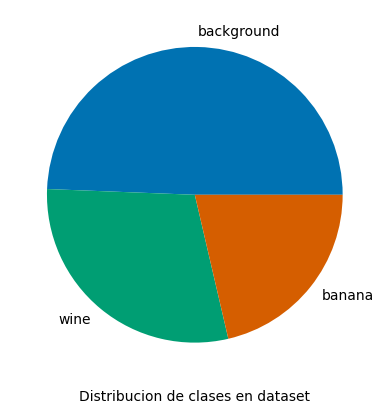

In [18]:
plt.rcParams['figure.dpi'] = 100
ax = df["class"].value_counts().plot(kind="pie")
ax.set_xlabel('Distribucion de clases en dataset')
ax.set_ylabel('')

['_mean', '_median', '_dev']
['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Hum']


<Figure size 3200x2400 with 0 Axes>

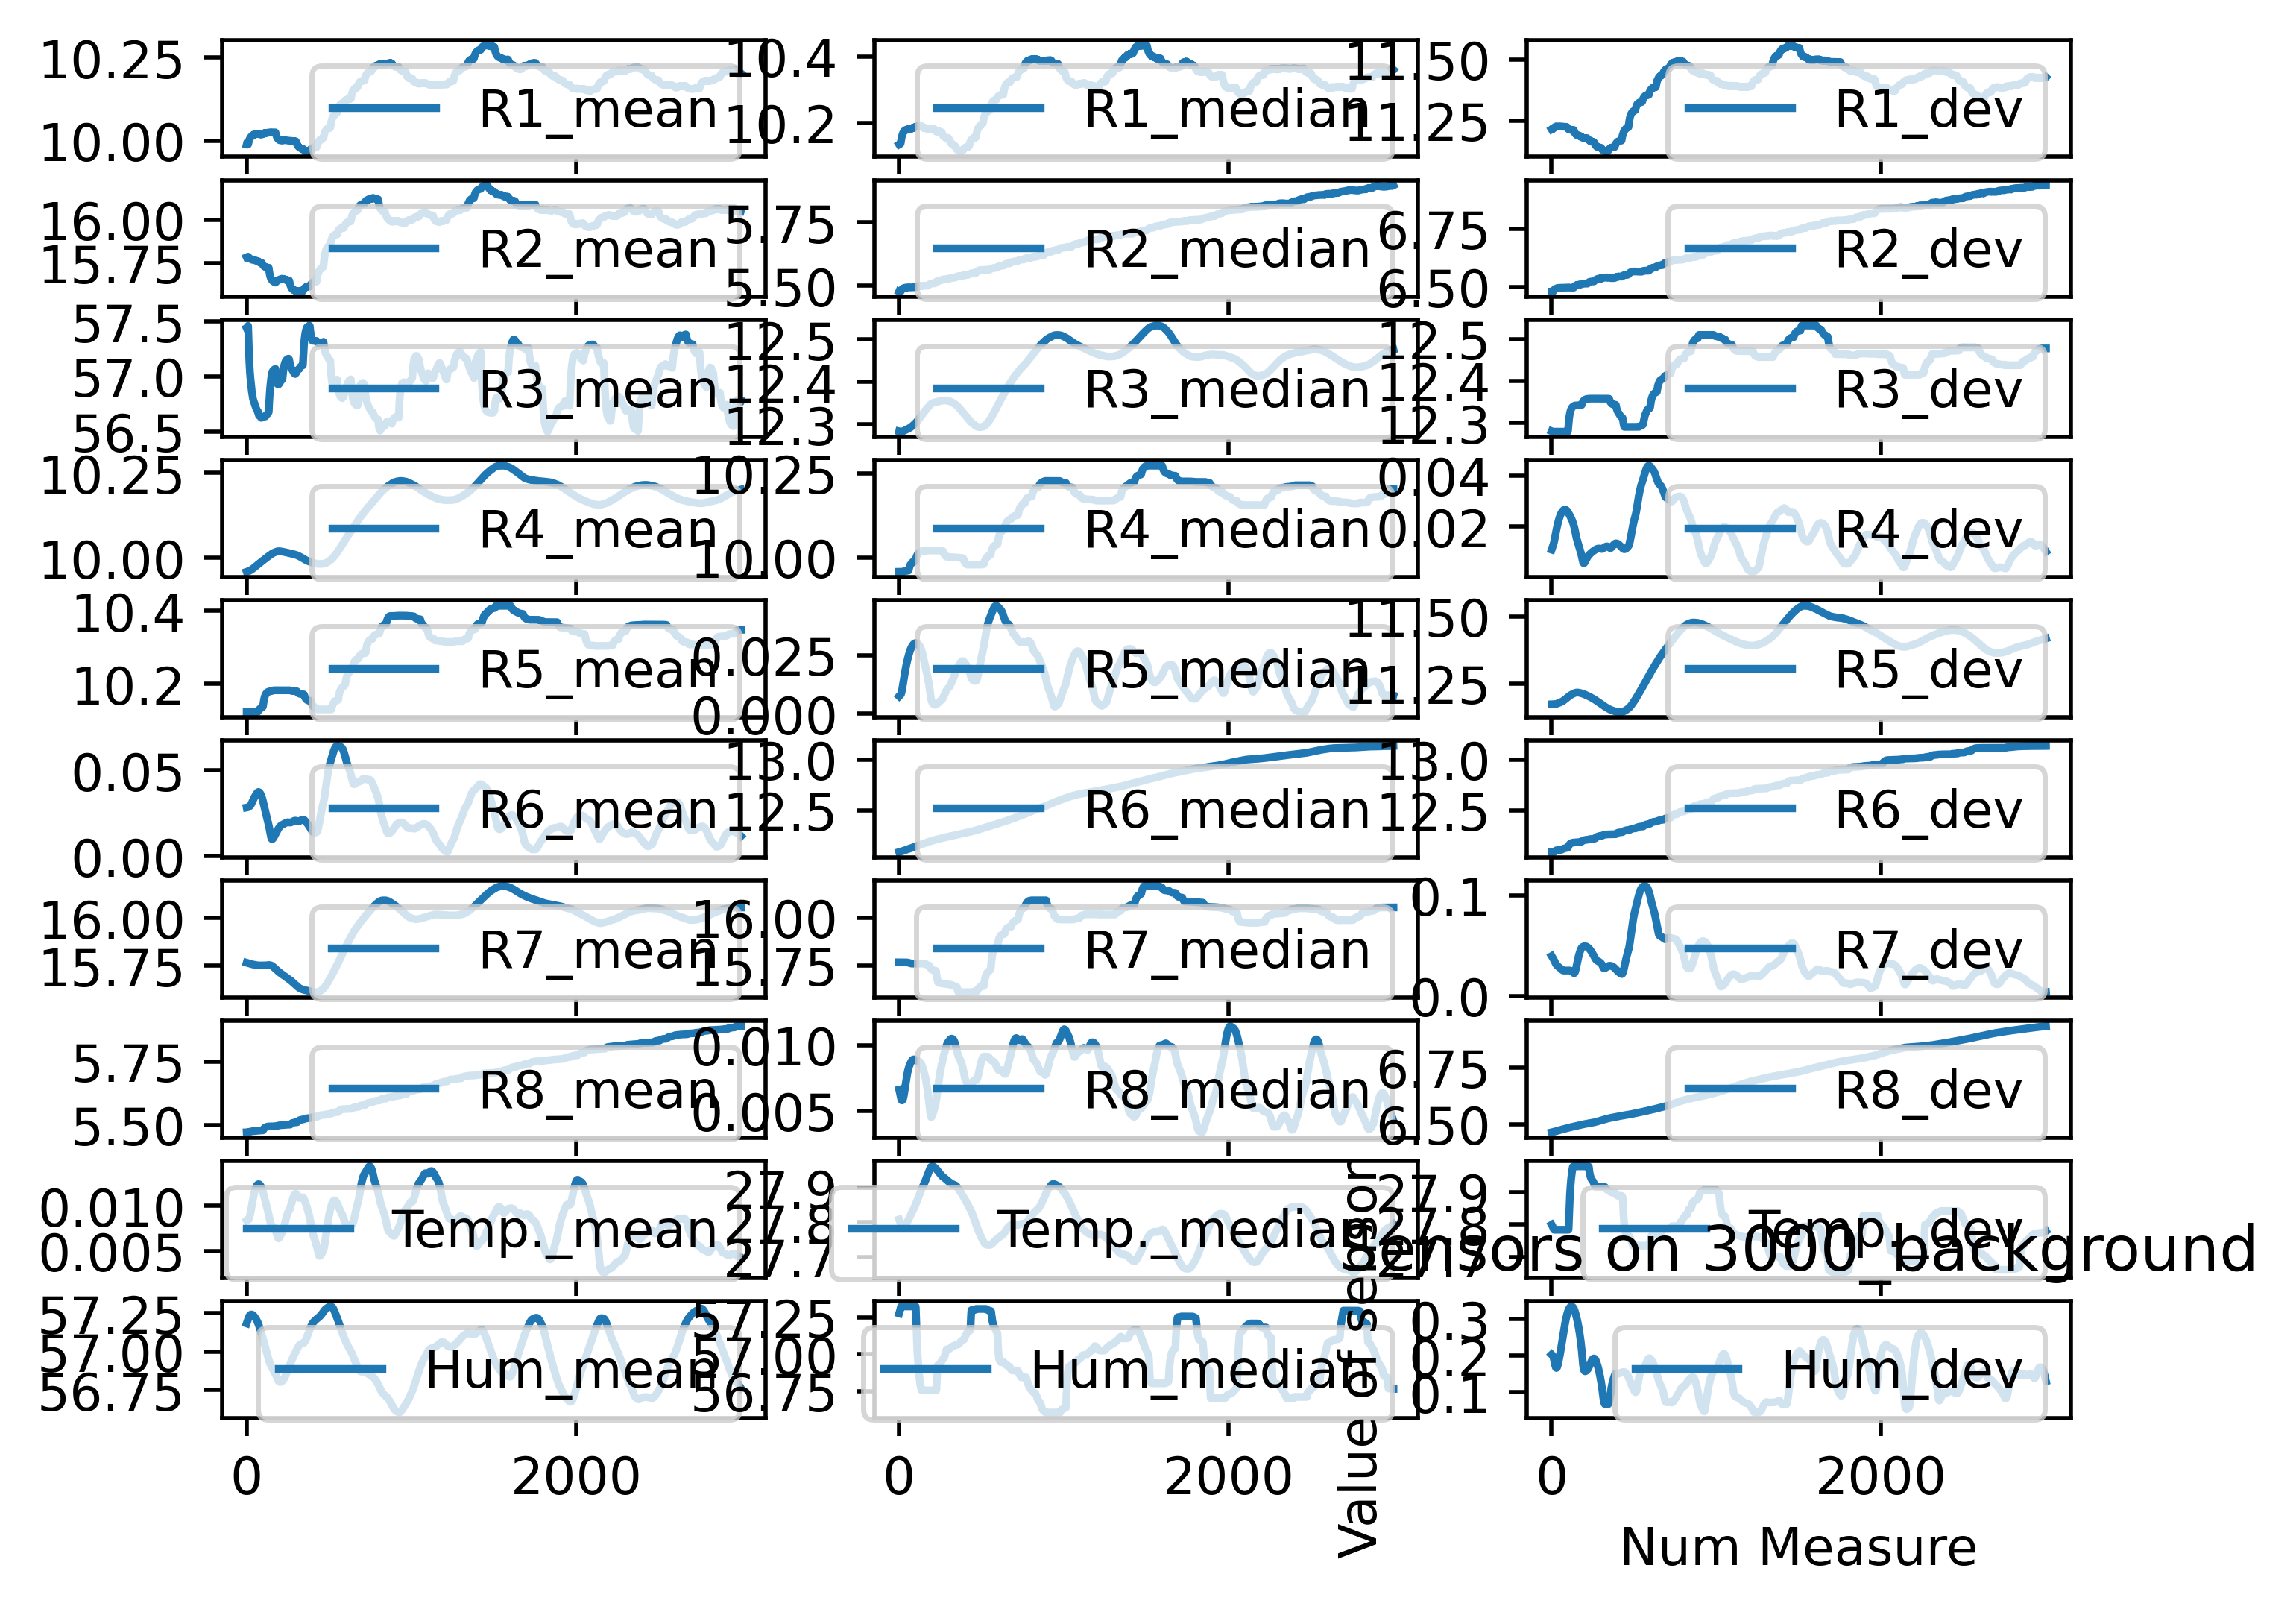

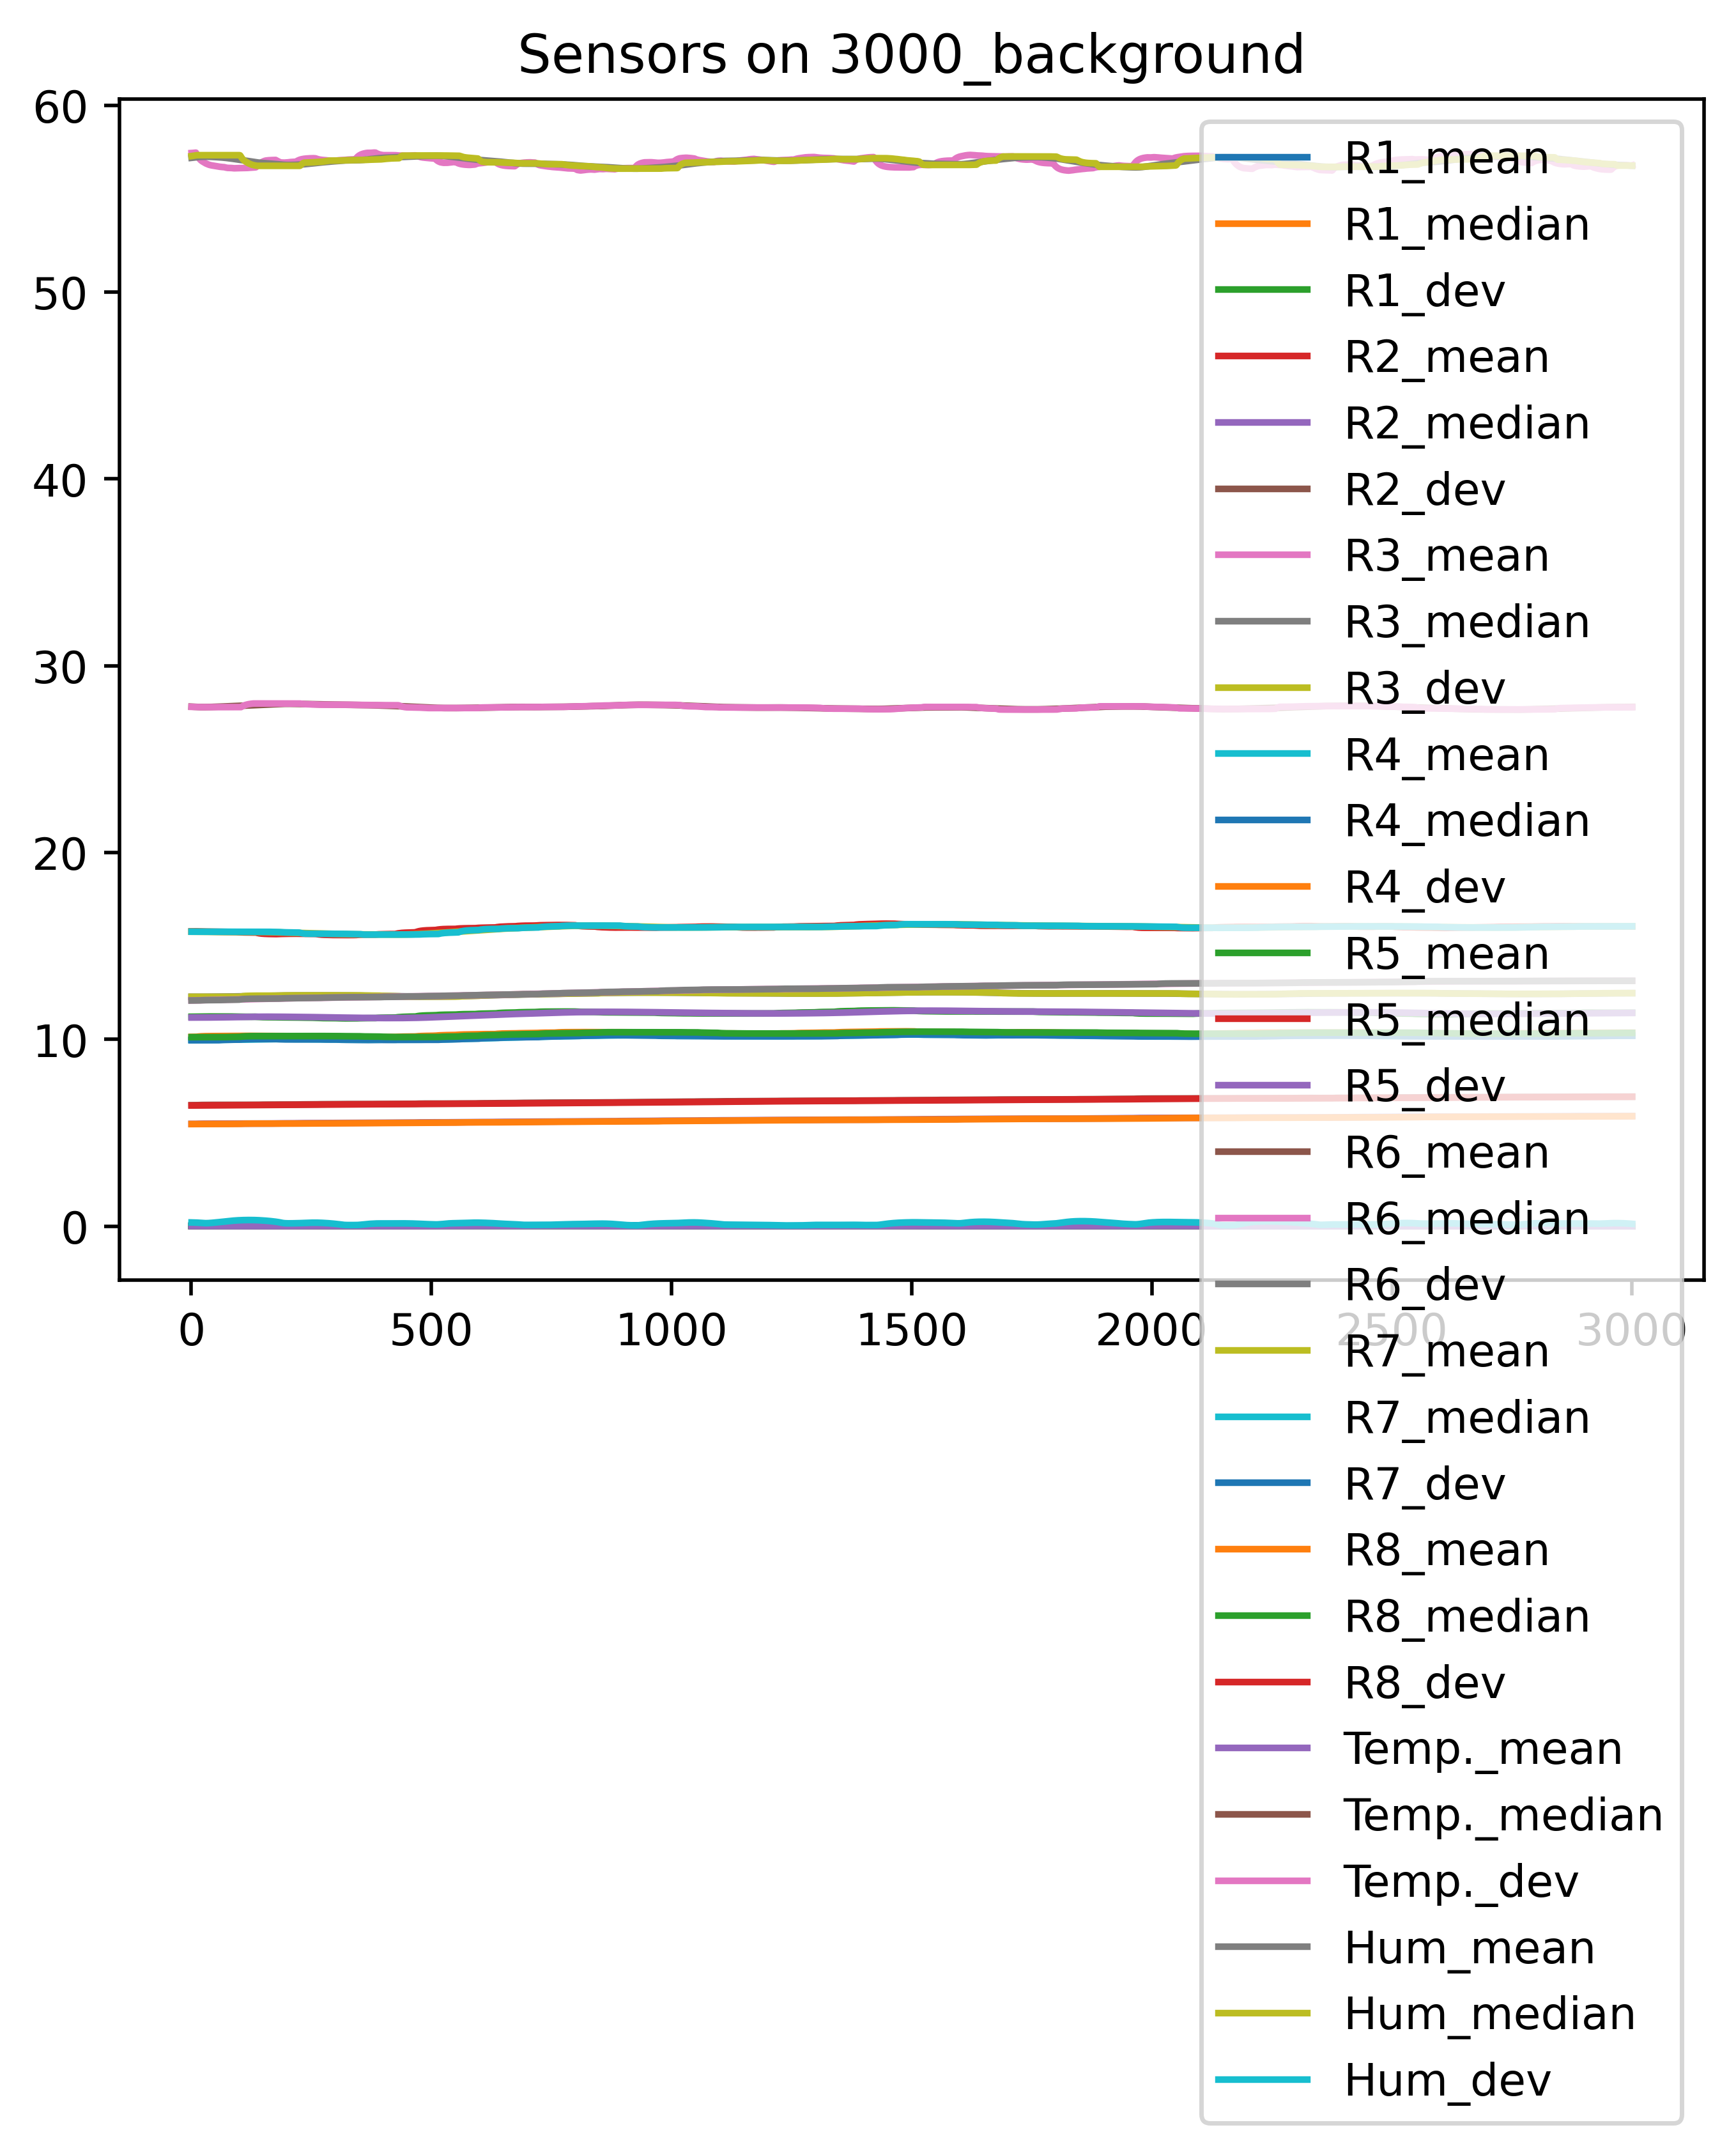

<Figure size 3200x2400 with 0 Axes>

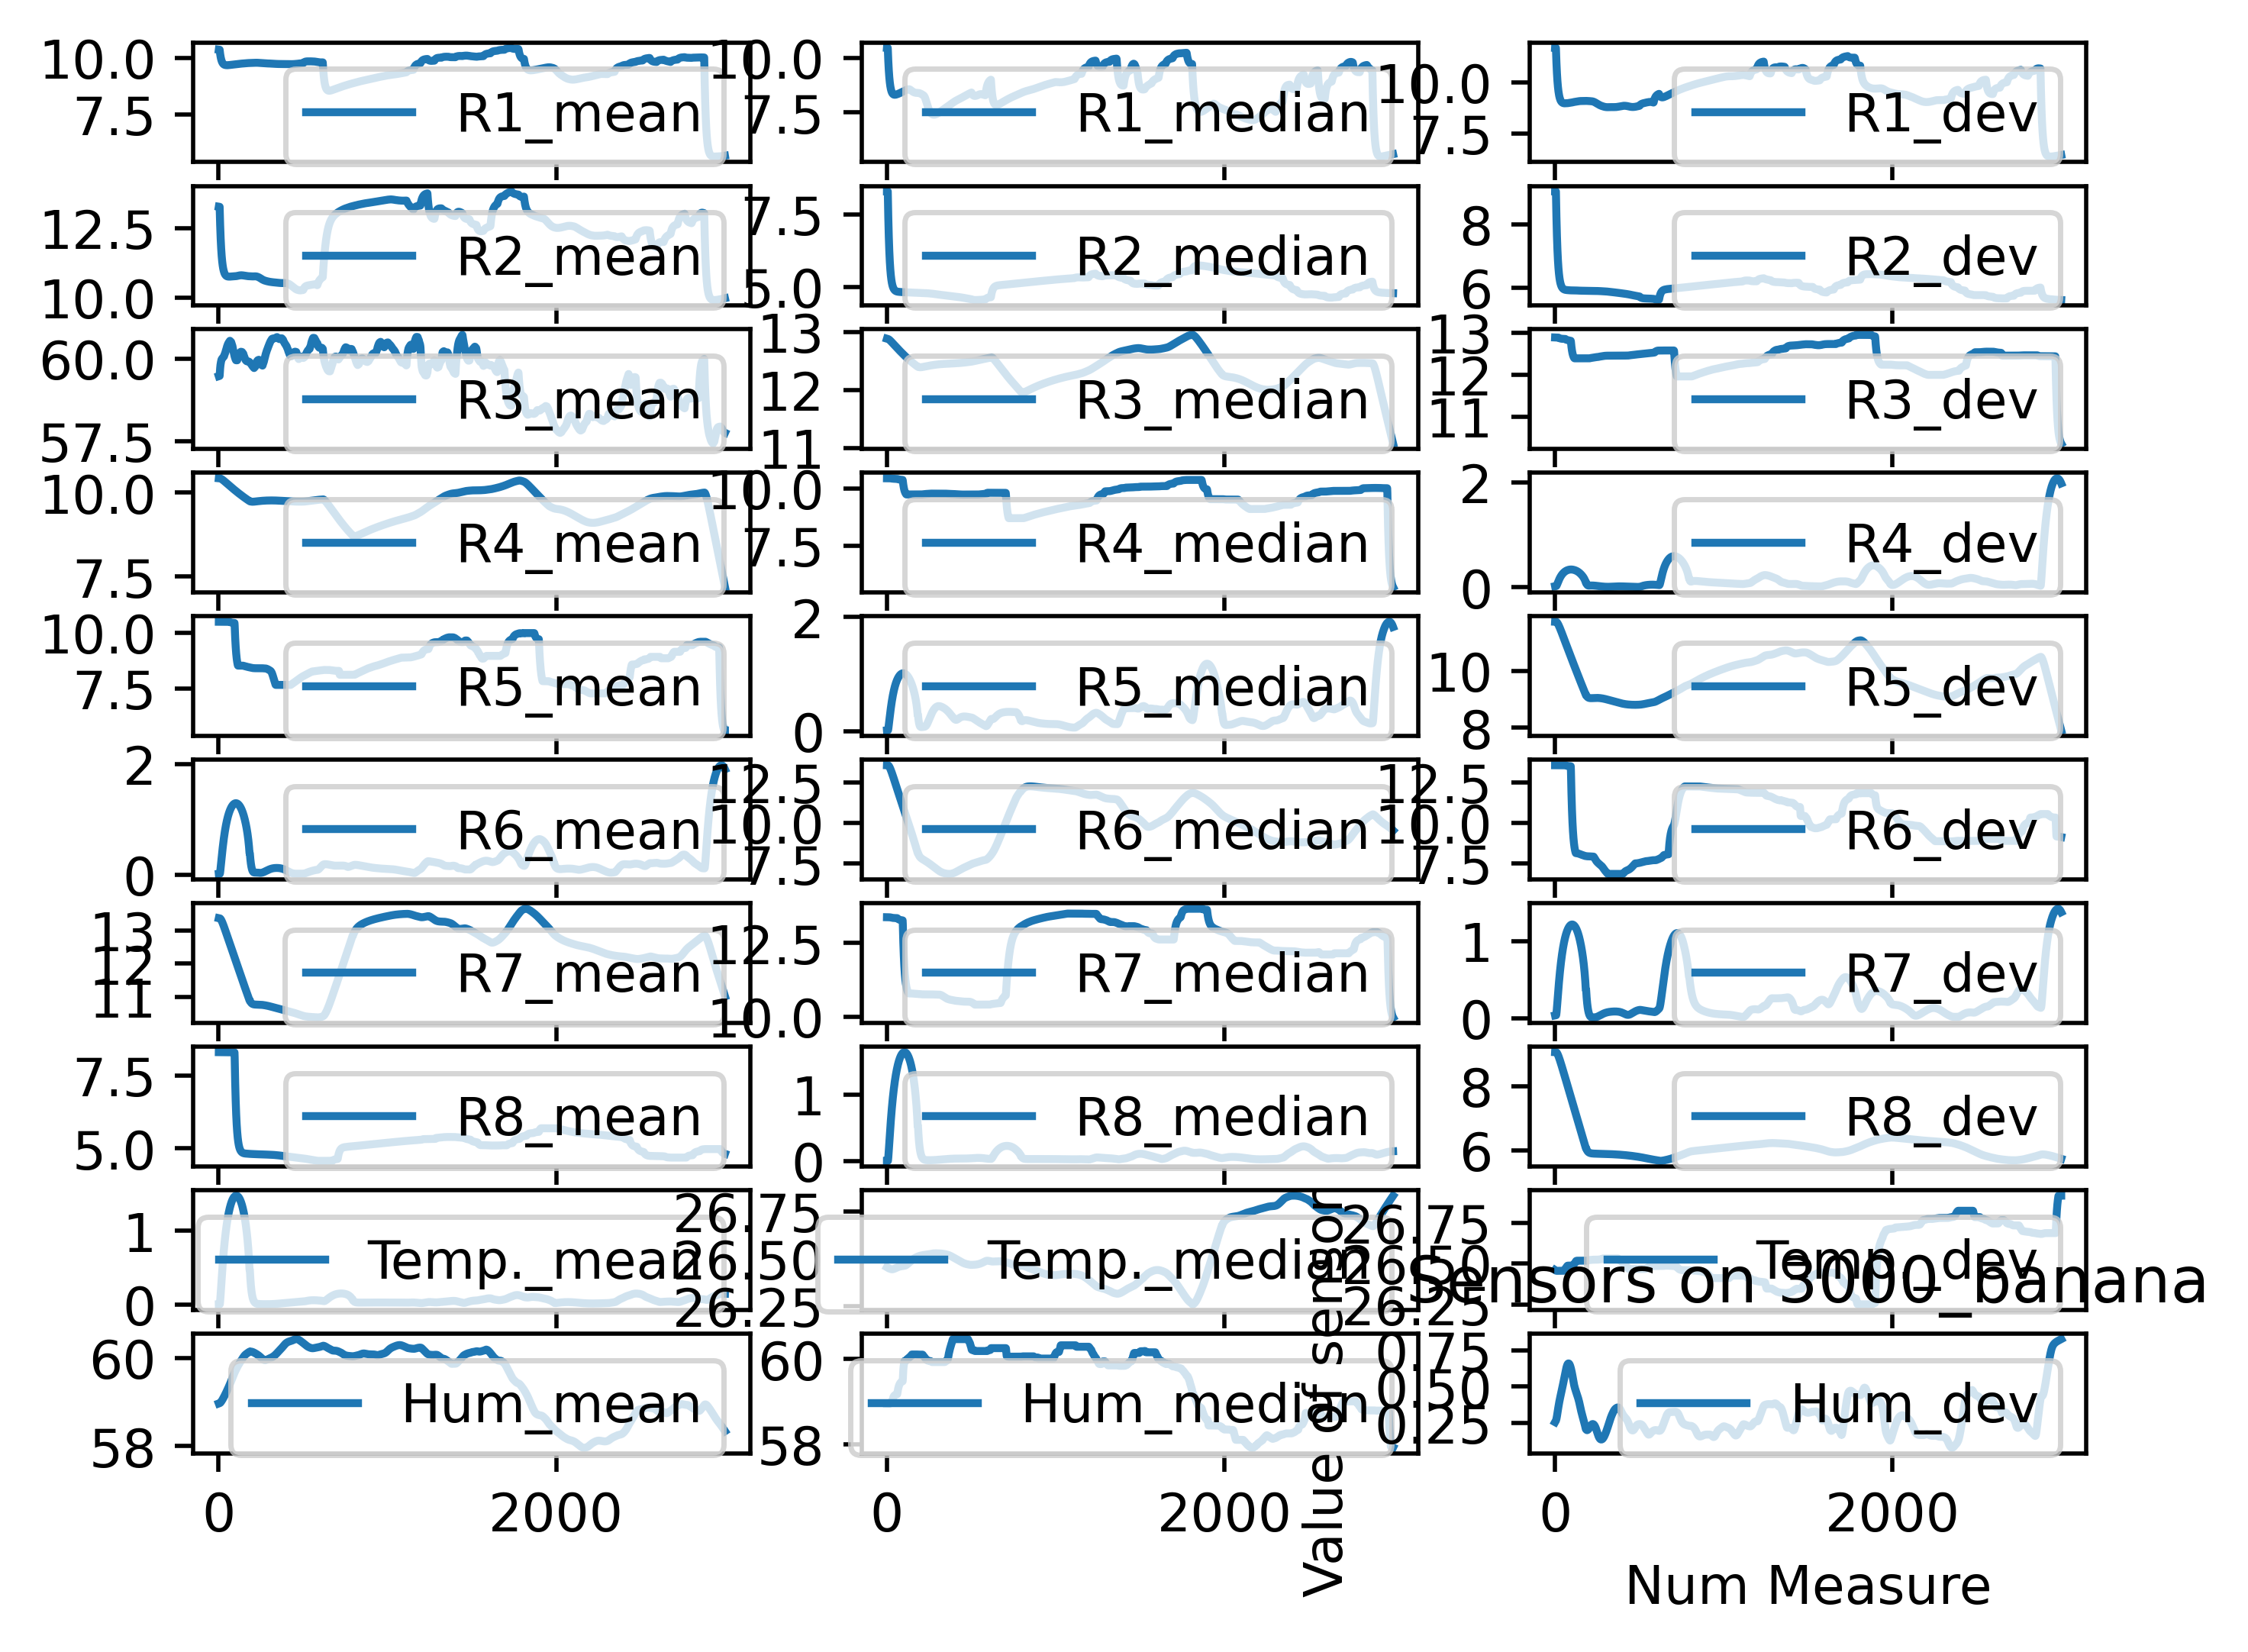

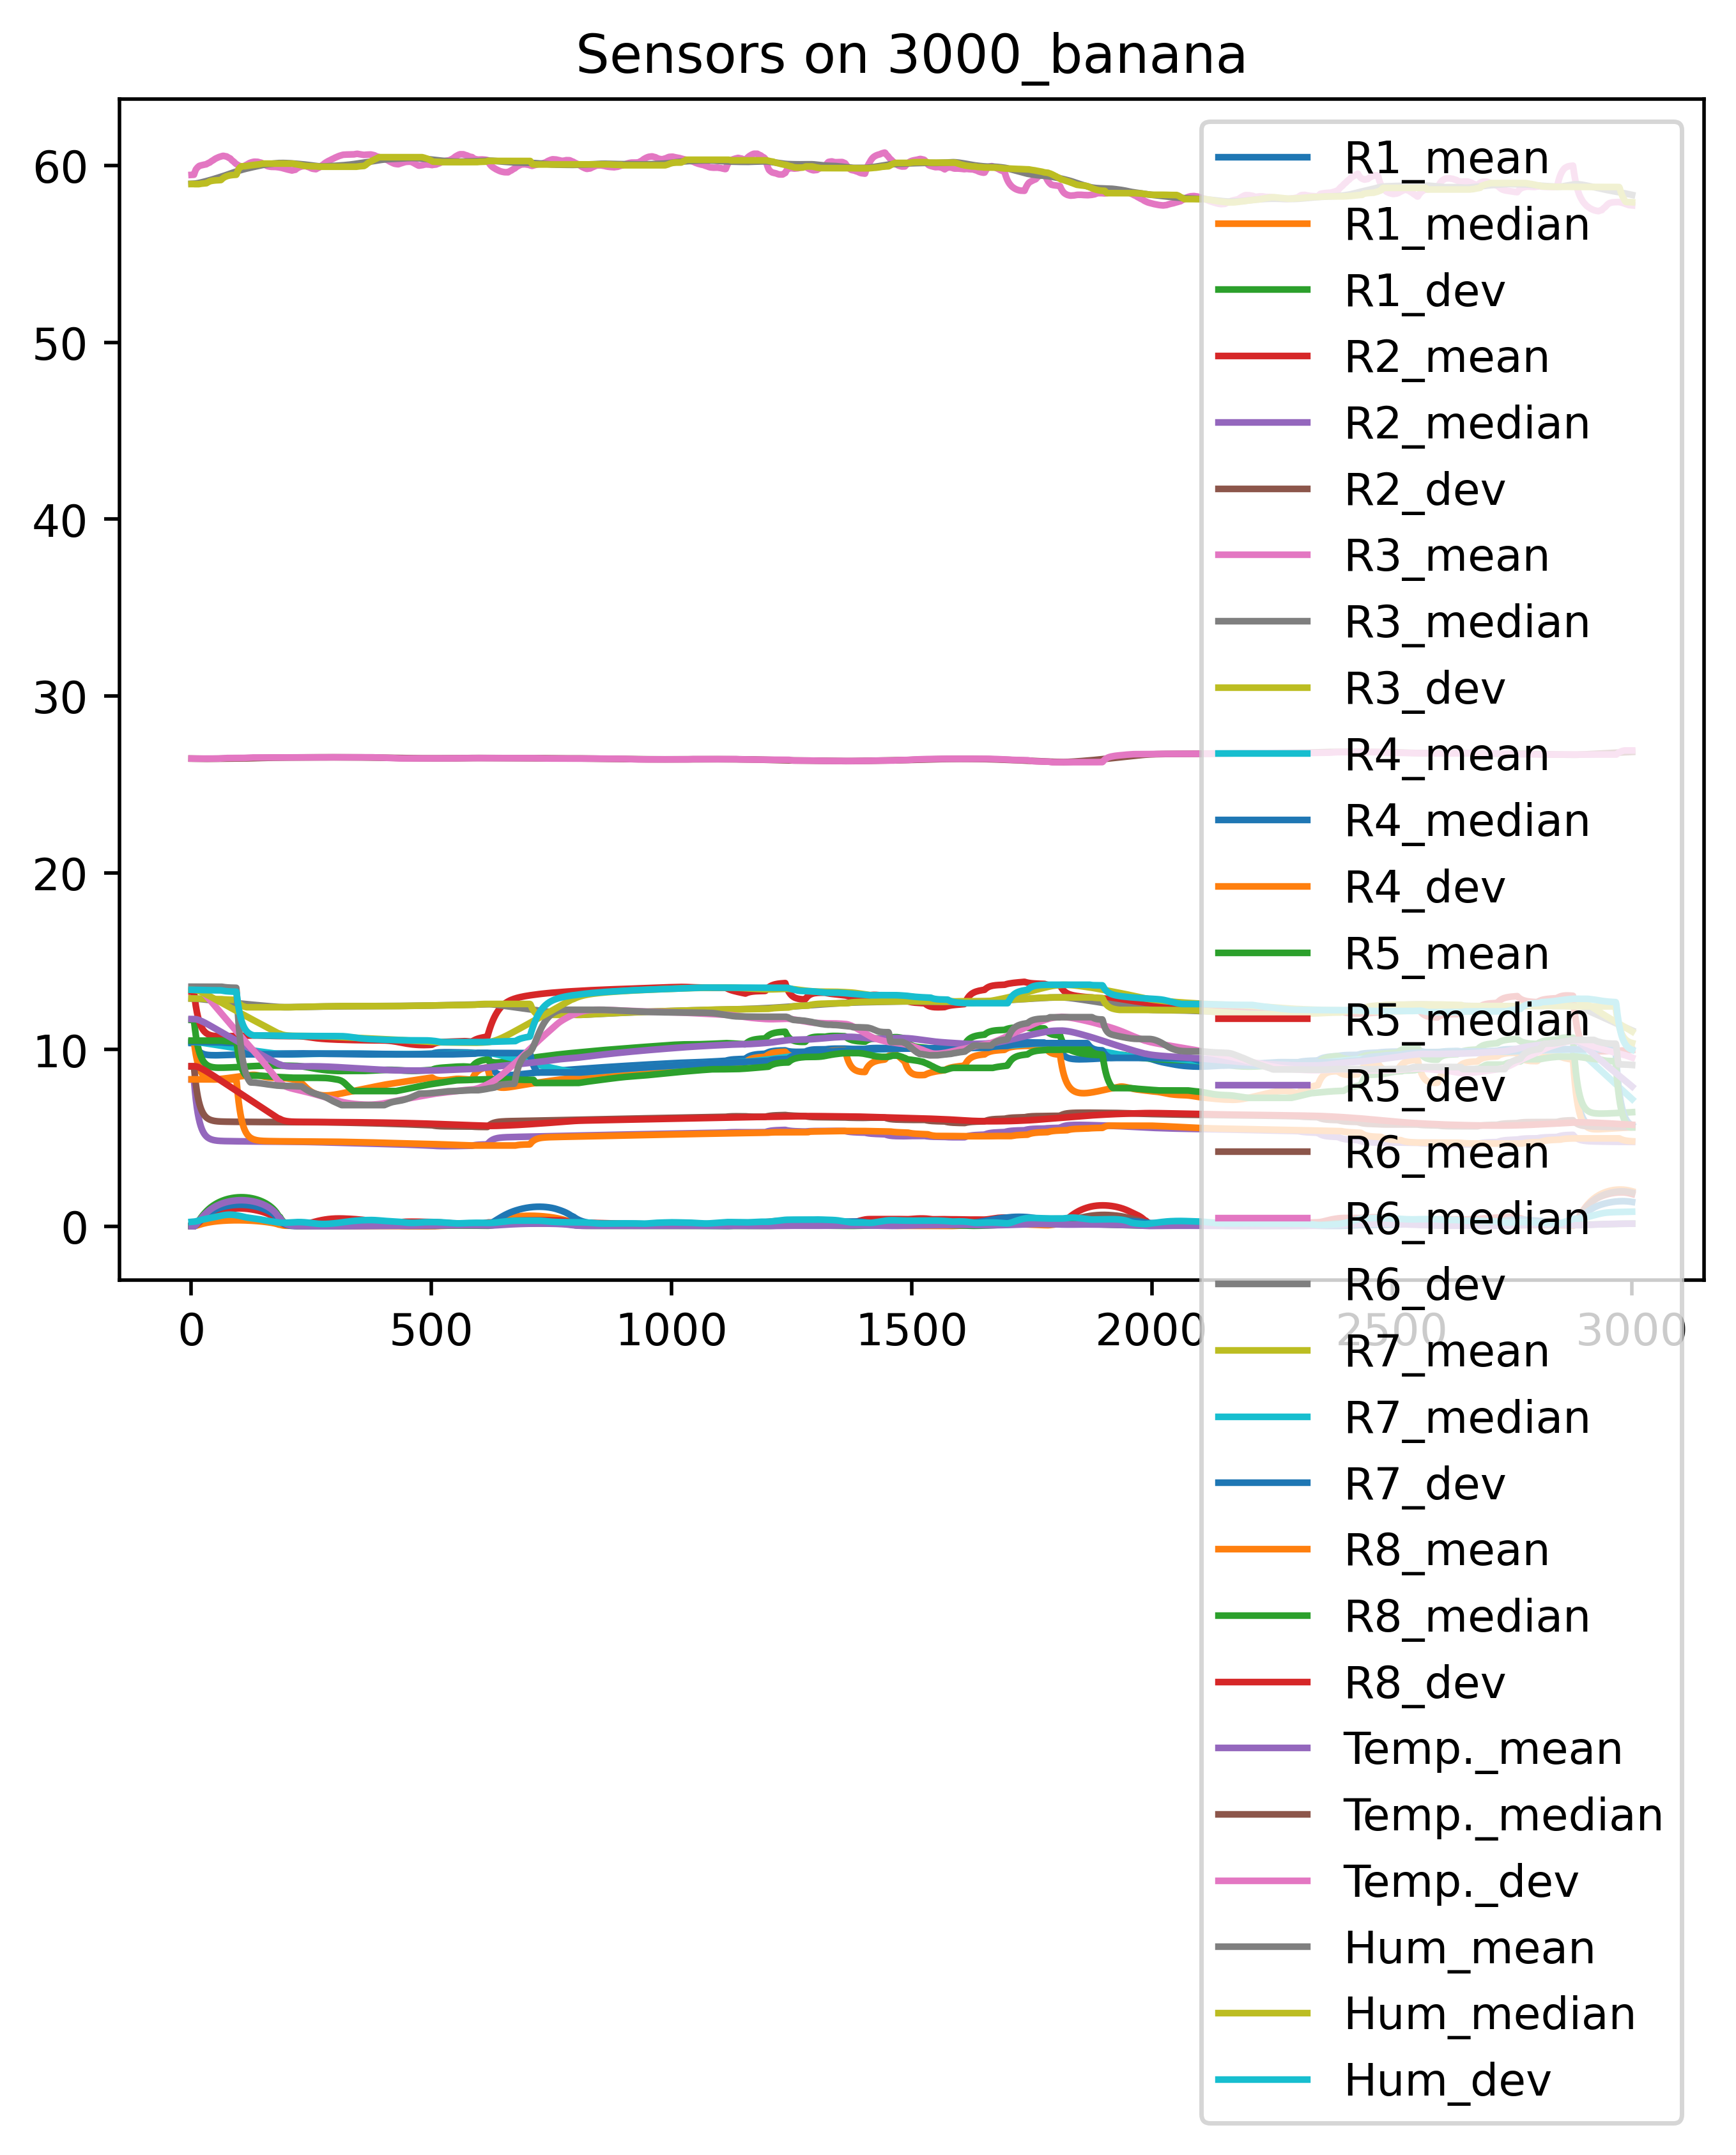

<Figure size 3200x2400 with 0 Axes>

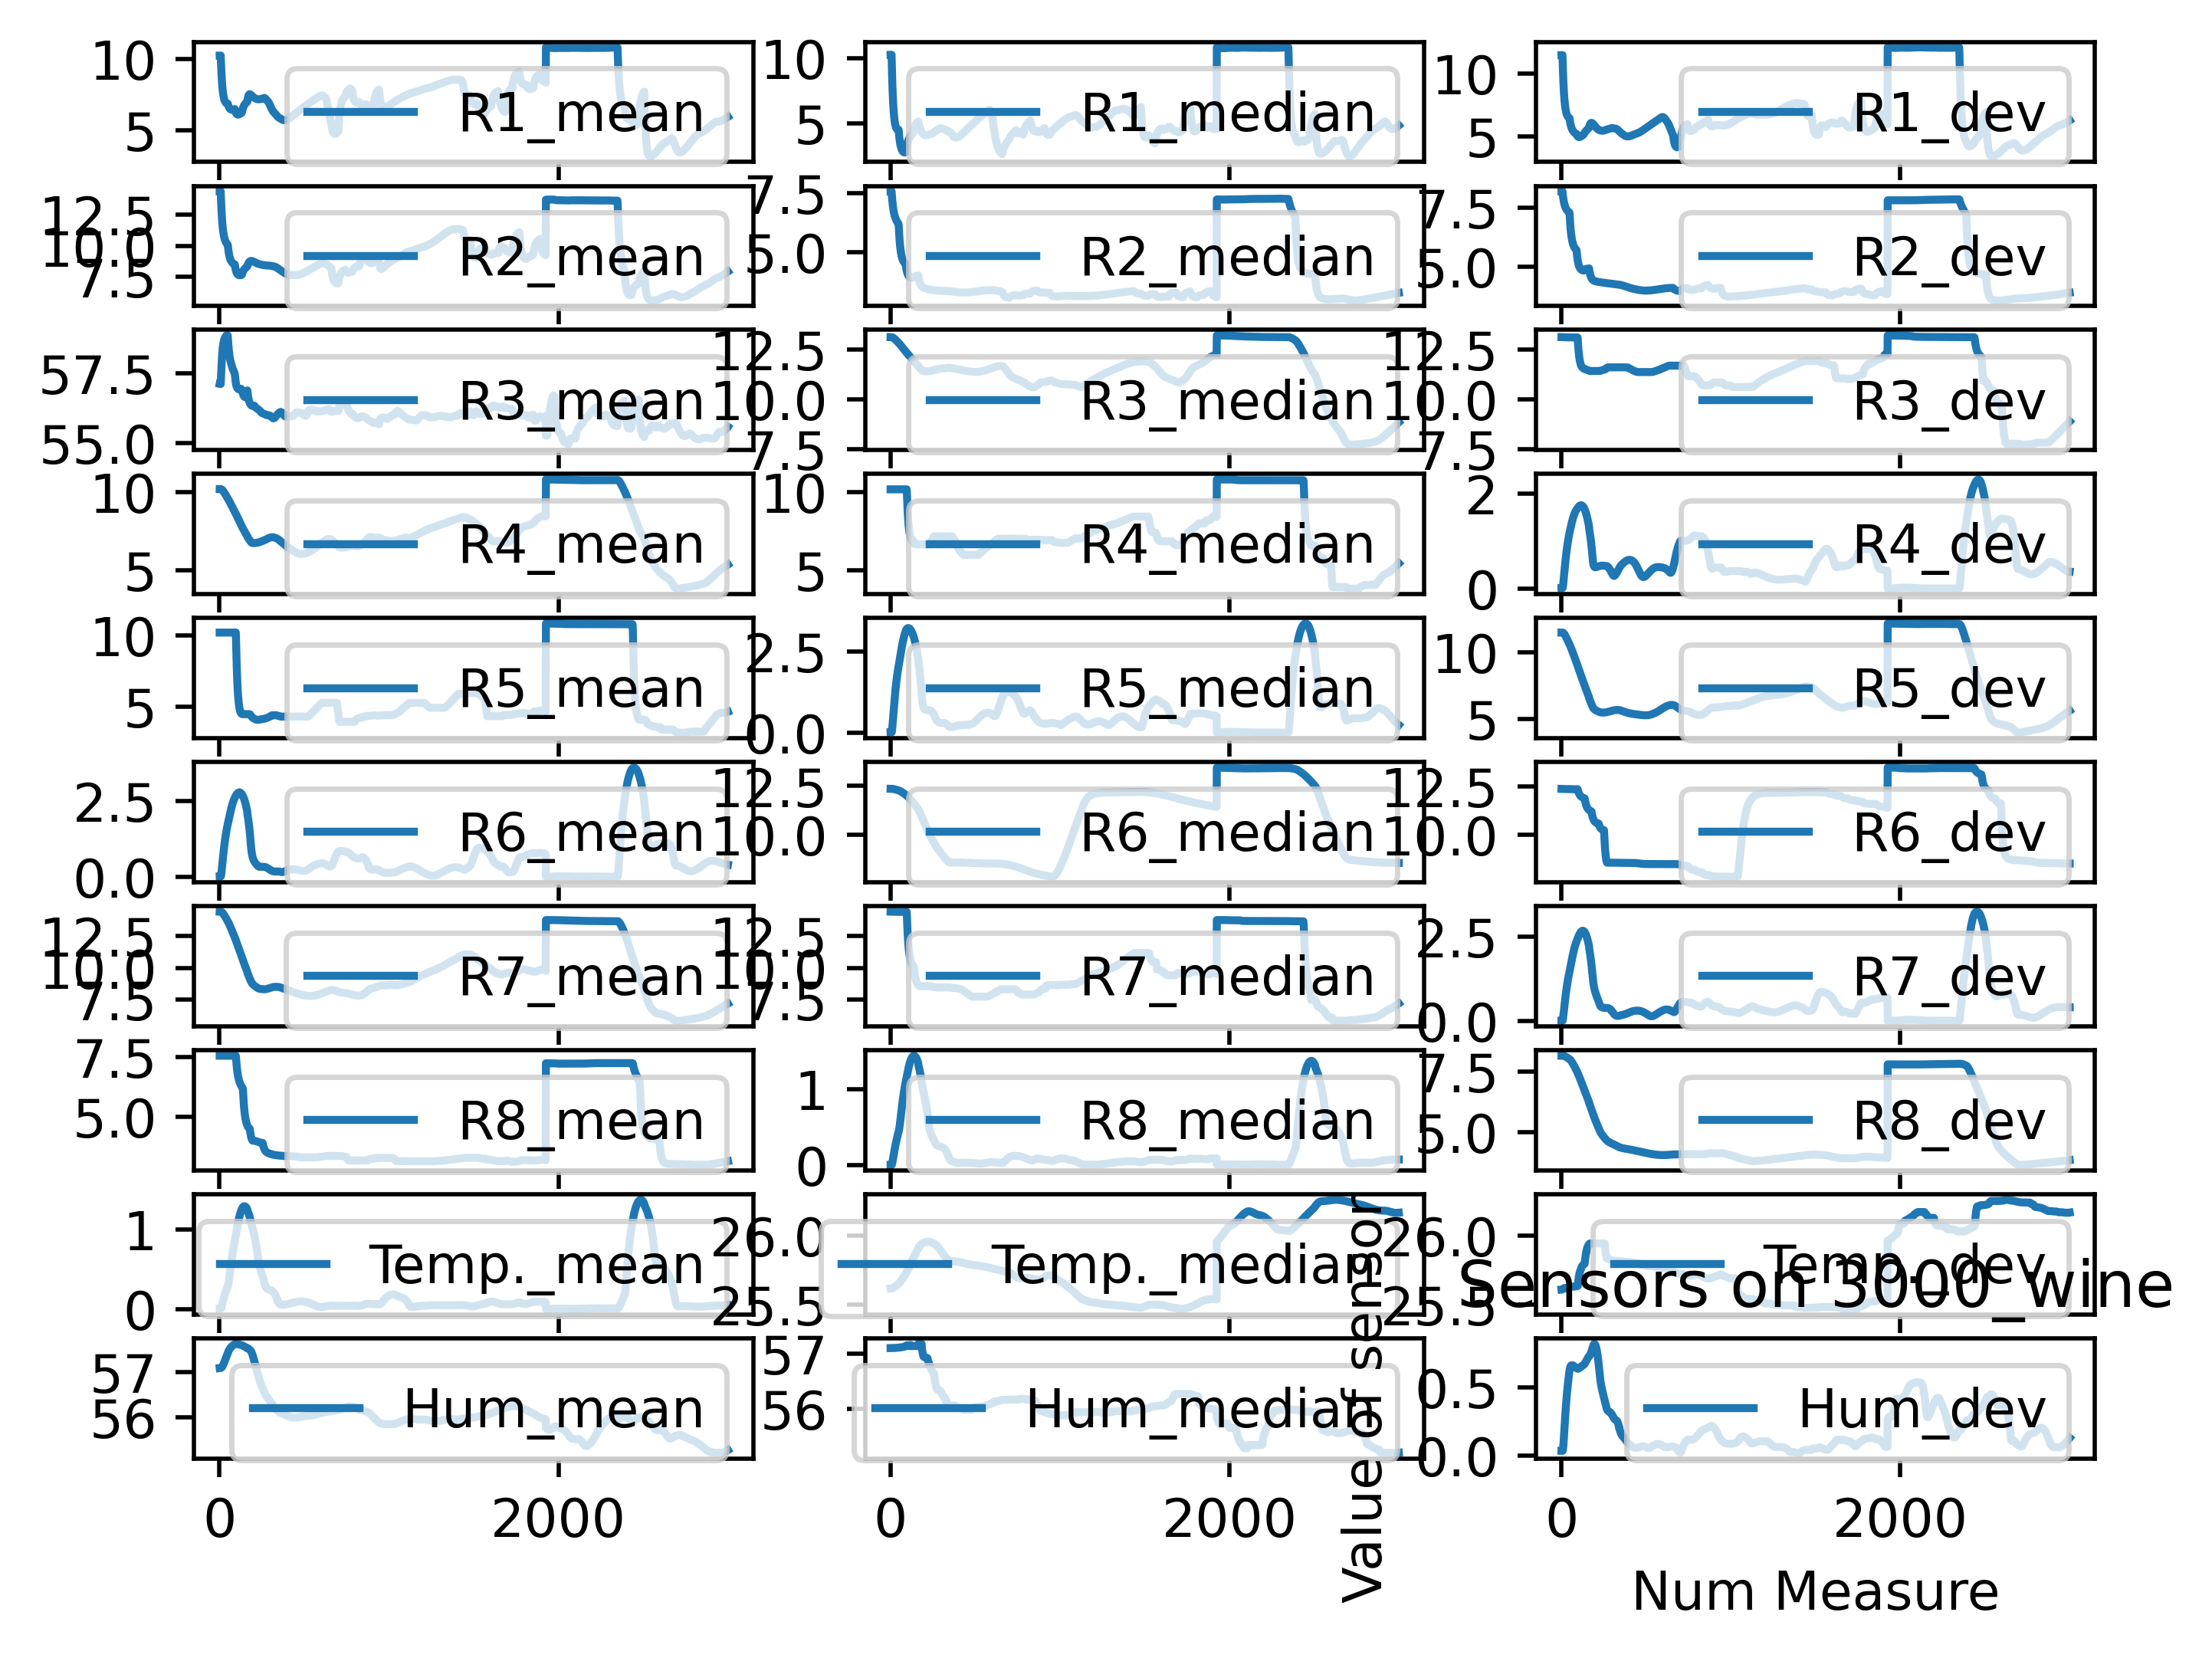

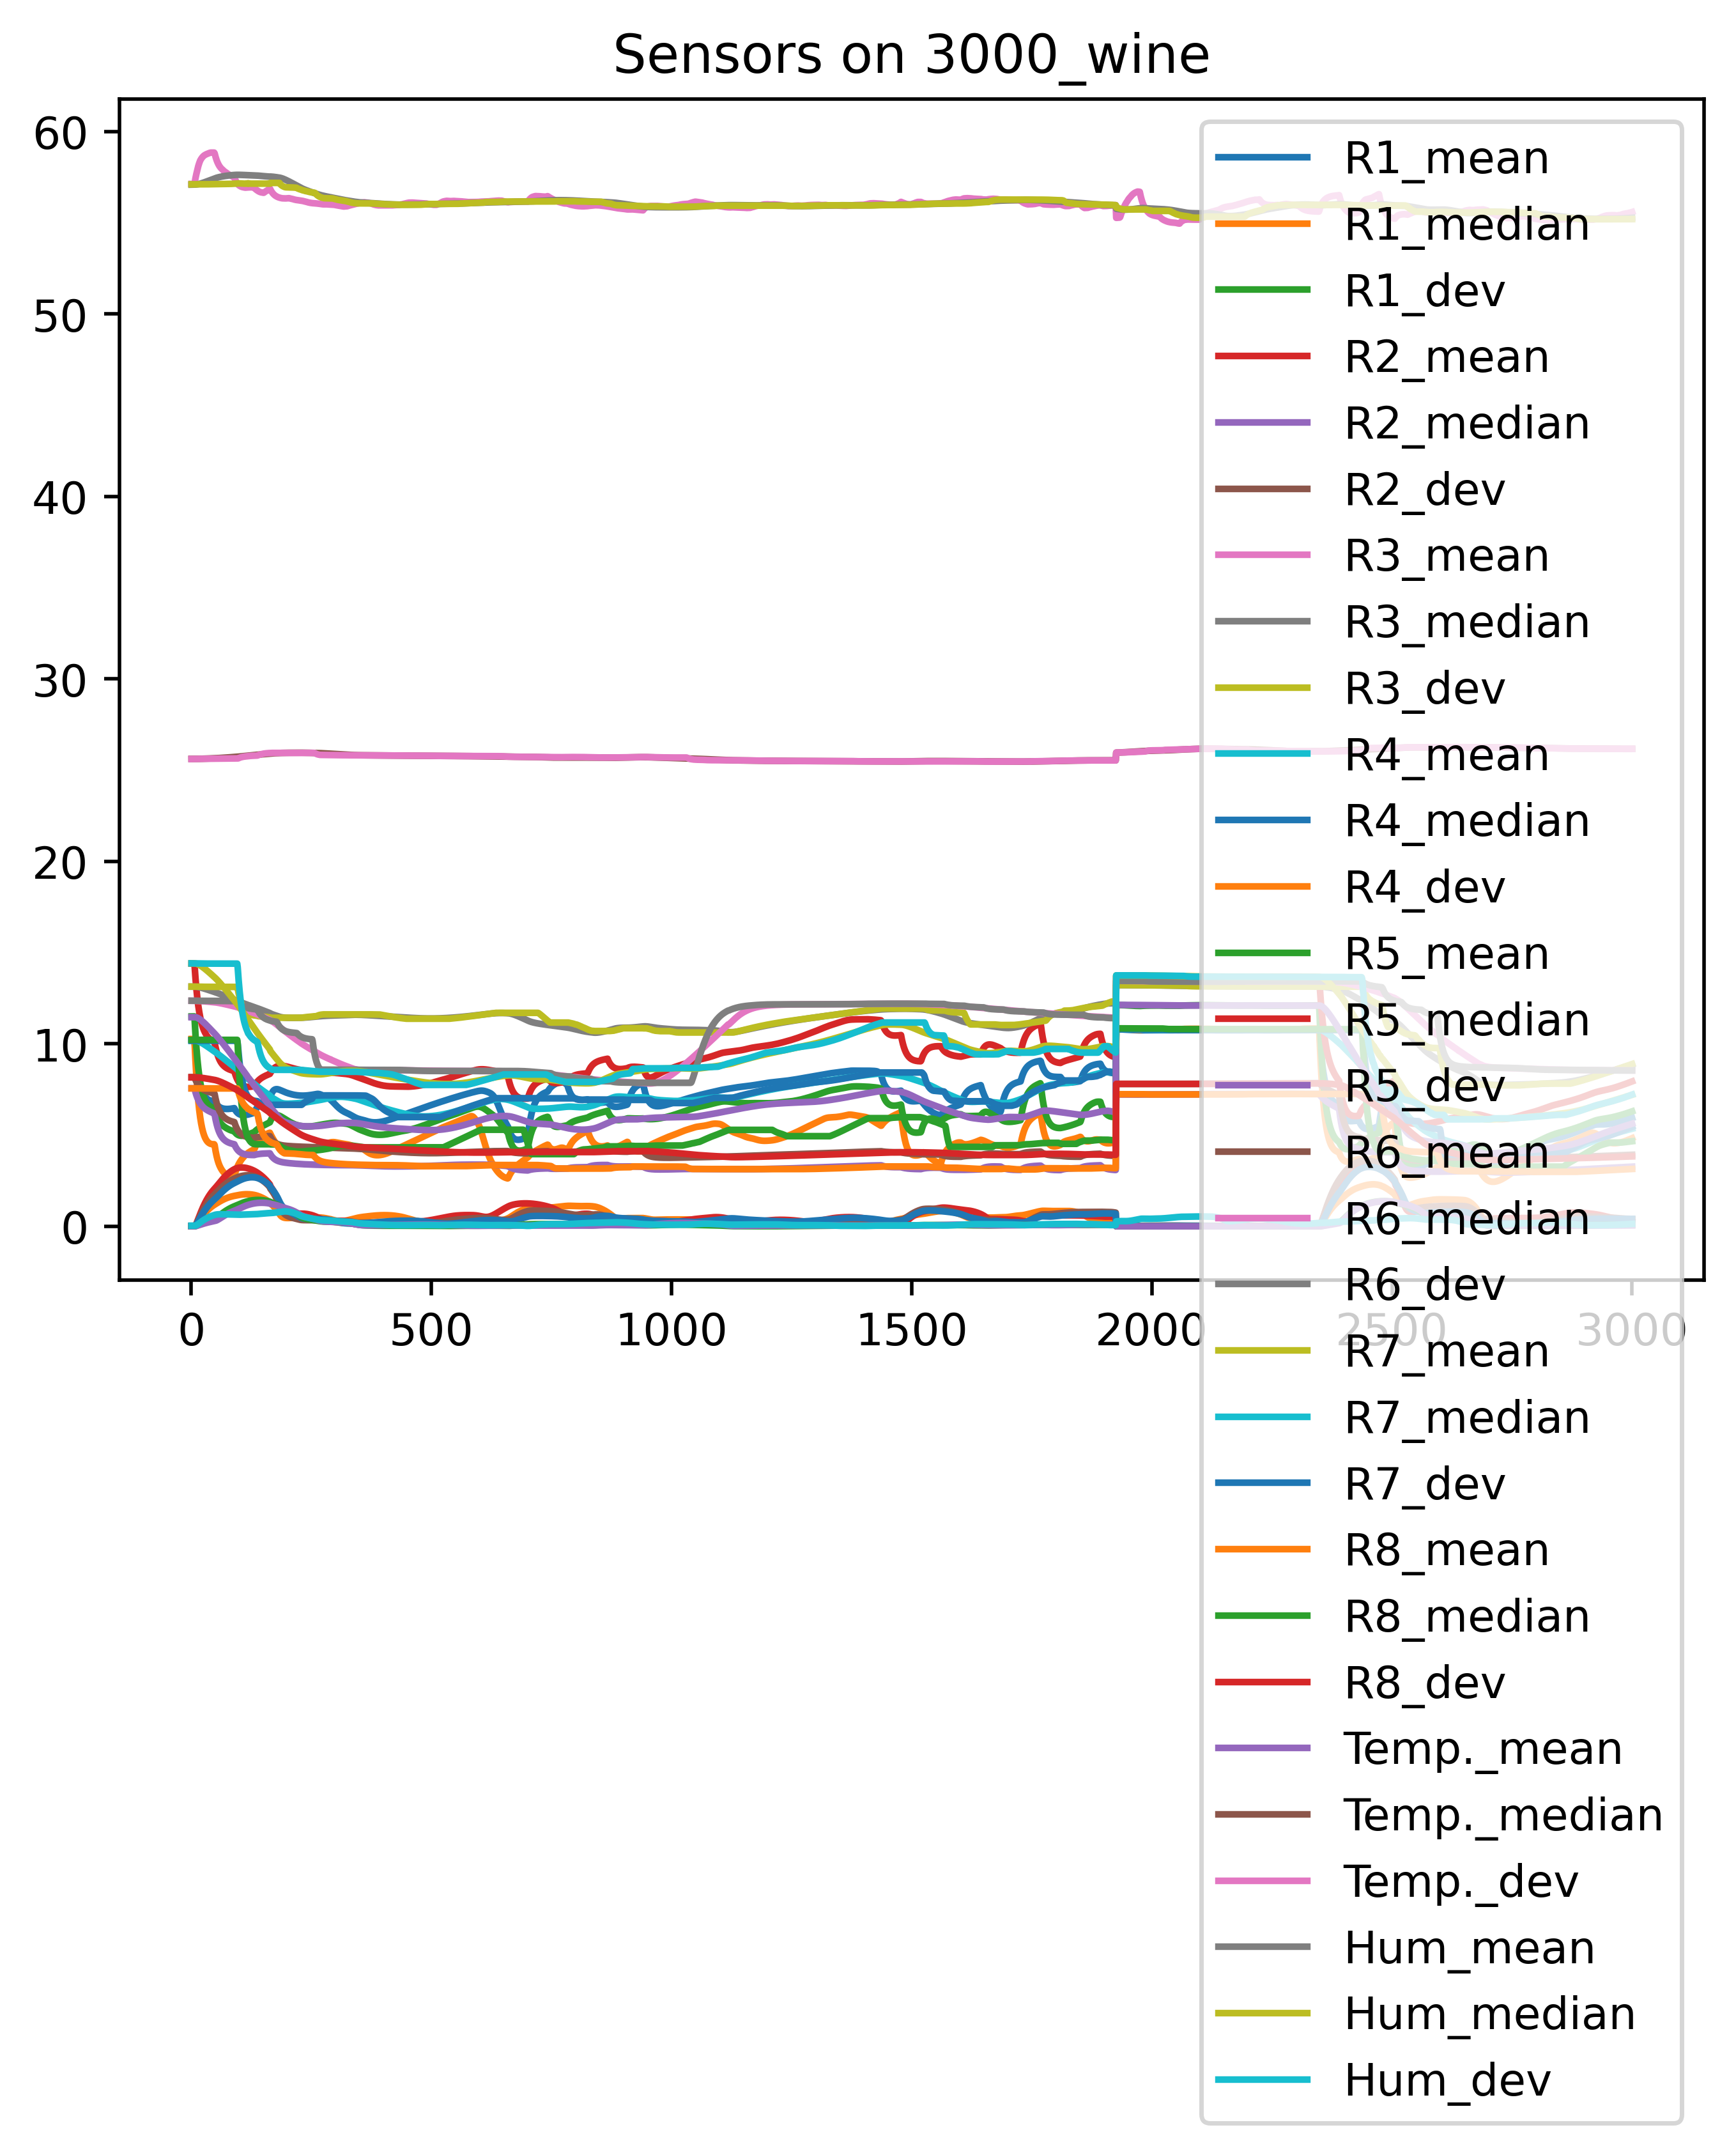

In [7]:
import os
class_column = df.iloc[:,-1] #obtenemos la columna de los valores
class_set = sorted(set(class_column)) #las hipótesis posibles
n_test = 3000
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 500
#obtengo el nombre y número de sesnores
sensors = [each for each in df.columns.values if len(each)<=2 and each[0]=="R"]

sensors.append("Temp.")
sensors.append('Hum')

#obtengo las medidas obtenidas a cada sensor
medidas = [each[len(sensors[0]):] for each in df.columns if sensors[0] in each and each!=sensors[0]]

print(medidas)
print(sensors)
#si no existe la carpeta de imágenes la creo
if not os.path.exists("images"):
    os.makedirs("images")

for value in class_set: #para cada uno de ellos mostramos una gráfica
    #inicializamos las distintas x
    y=[]
    for i in range(len(sensors)):
        y.append([])
        for j in range(len(medidas)):
            y[i].append([])
    x = list(range(1, n_test+1))
    rows = df.loc[df["class"]==value][:n_test]
    #para cada una de las medidas de test
    #obtenemos los datos de cada sensor
    for index in range(n_test):
        #para cada uno de los sensores obtenemos los valores de sus medidas
        for i_s, sensor in enumerate(sensors):
            #para cada una de las medidas
            for i_m, medida in enumerate(medidas):
                aux = sensor+medida
                y[i_s][i_m].append(rows.iloc[index][aux])
    figure, axis = plt.subplots(len(sensors), len(medidas))
    plt.xlabel("Num Measure")
    plt.ylabel("Value of sensor")

    for i_s, sensor in enumerate(sensors):
        for i_m, medida in enumerate(medidas):
            #esta figura es una cuadricula con las filas los sensores y columnas los valores de cada sensor
            plt.figure(1)
            axis[i_s][i_m].plot(x, y[i_s][i_m], label=sensor+medida)
            axis[i_s][i_m].legend(loc='upper right')
            plt.title("Sensor "  + sensor + " on " + str(n_test) + " measurements class " + value)

            plt.figure(2) #la figura 2 es combinar una fila
            plt.plot(x, y[i_s][i_m], label=sensor+medida)
            plt.title("Sensor "  + sensor + " on " + str(n_test) + " measurements class " + value)
            plt.legend()

            plt.figure(3) #la figura 3 es combinar filas y columnas
            plt.plot(x, y[i_s][i_m], label=sensor+medida)

            plt.legend()
        #si no existe la carpeta de imágenes para ese valor, lo creo
        if not os.path.exists("images/" + value):
            os.makedirs("images/" + value)

        plt.figure(2).savefig('images/' + value + "/" + sensor + "_" + str(n_test) + ".jpg") #guardamos los valores de la figura 2 y borramos
        plt.clf()


    #plt.savefig('images/' + value + "/" + sensor + "_" + str(n_test) + ".jpg")
    plt.figure(1).savefig('images/' + value + "/AllSensorsSeparated.jpg")
    plt.title("Sensors on " + str(n_test) +"_"+ value)

    plt.figure(3).savefig('images/' + value + "/AllSensorsCombined.jpg")
    plt.title("Sensors on " + str(n_test) +"_"+ value)
    #plt.savefig('images/' + value + "/sensors_" + str(n_test) +"_"+ value + ".jpg")
    
    plt.show()
    


['_mean', '_median', '_dev']
['Temp.', 'Hum']


<Figure size 6000x3000 with 0 Axes>

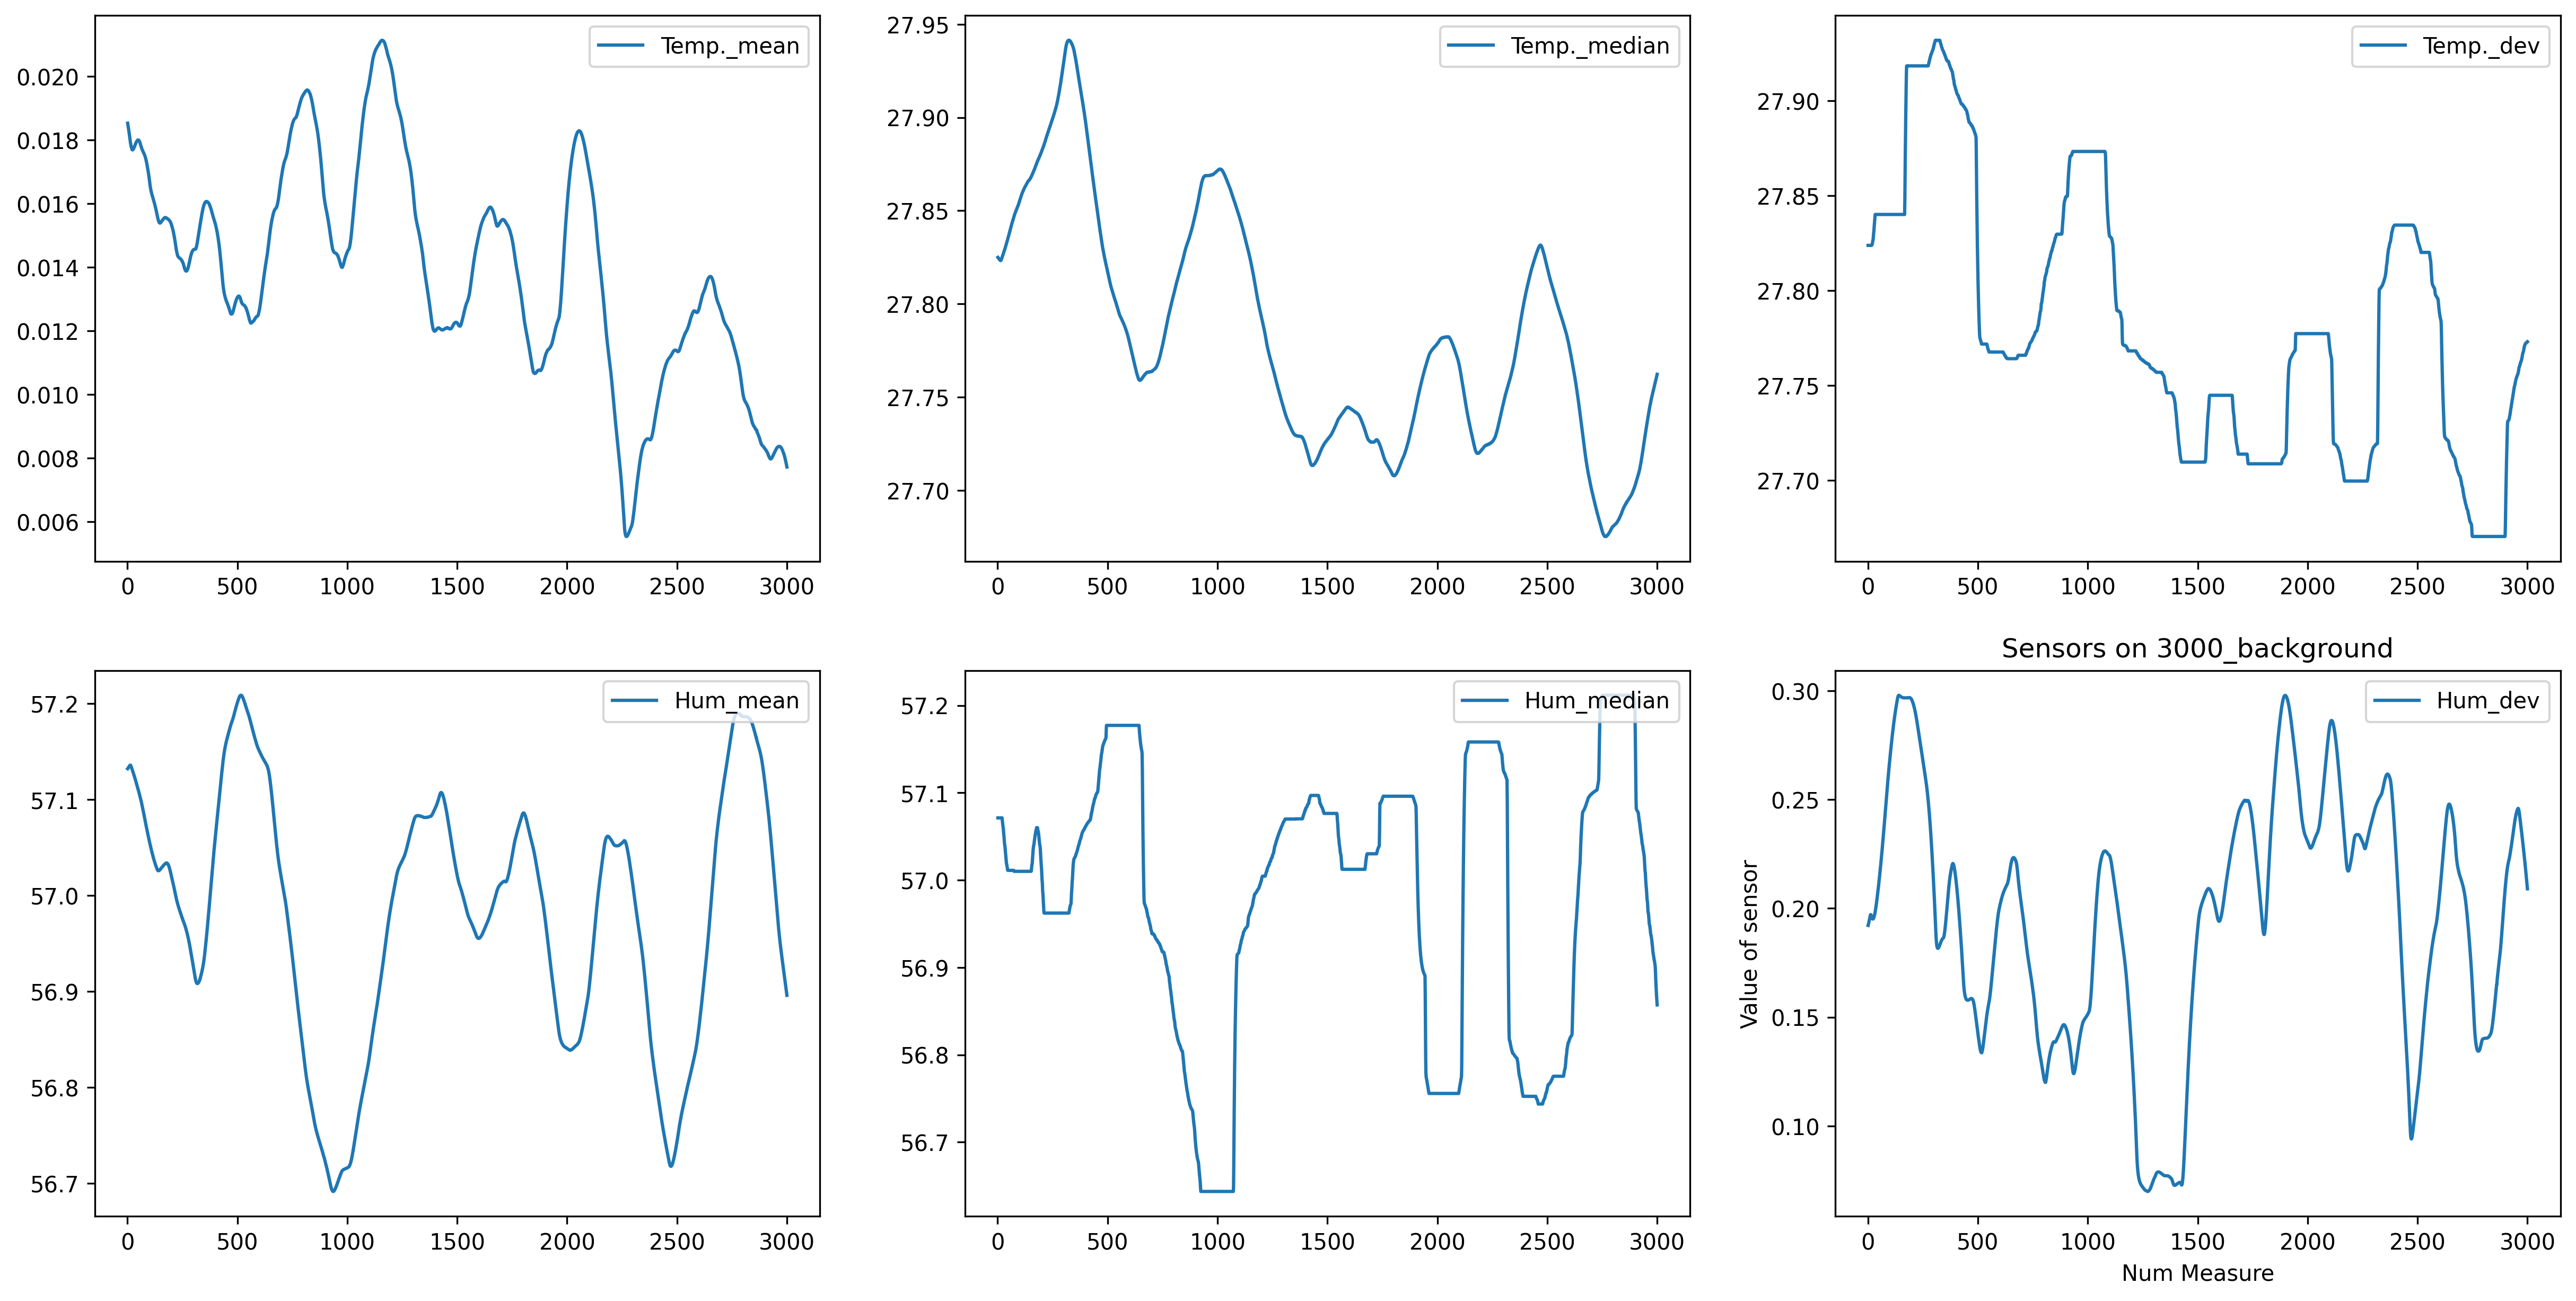

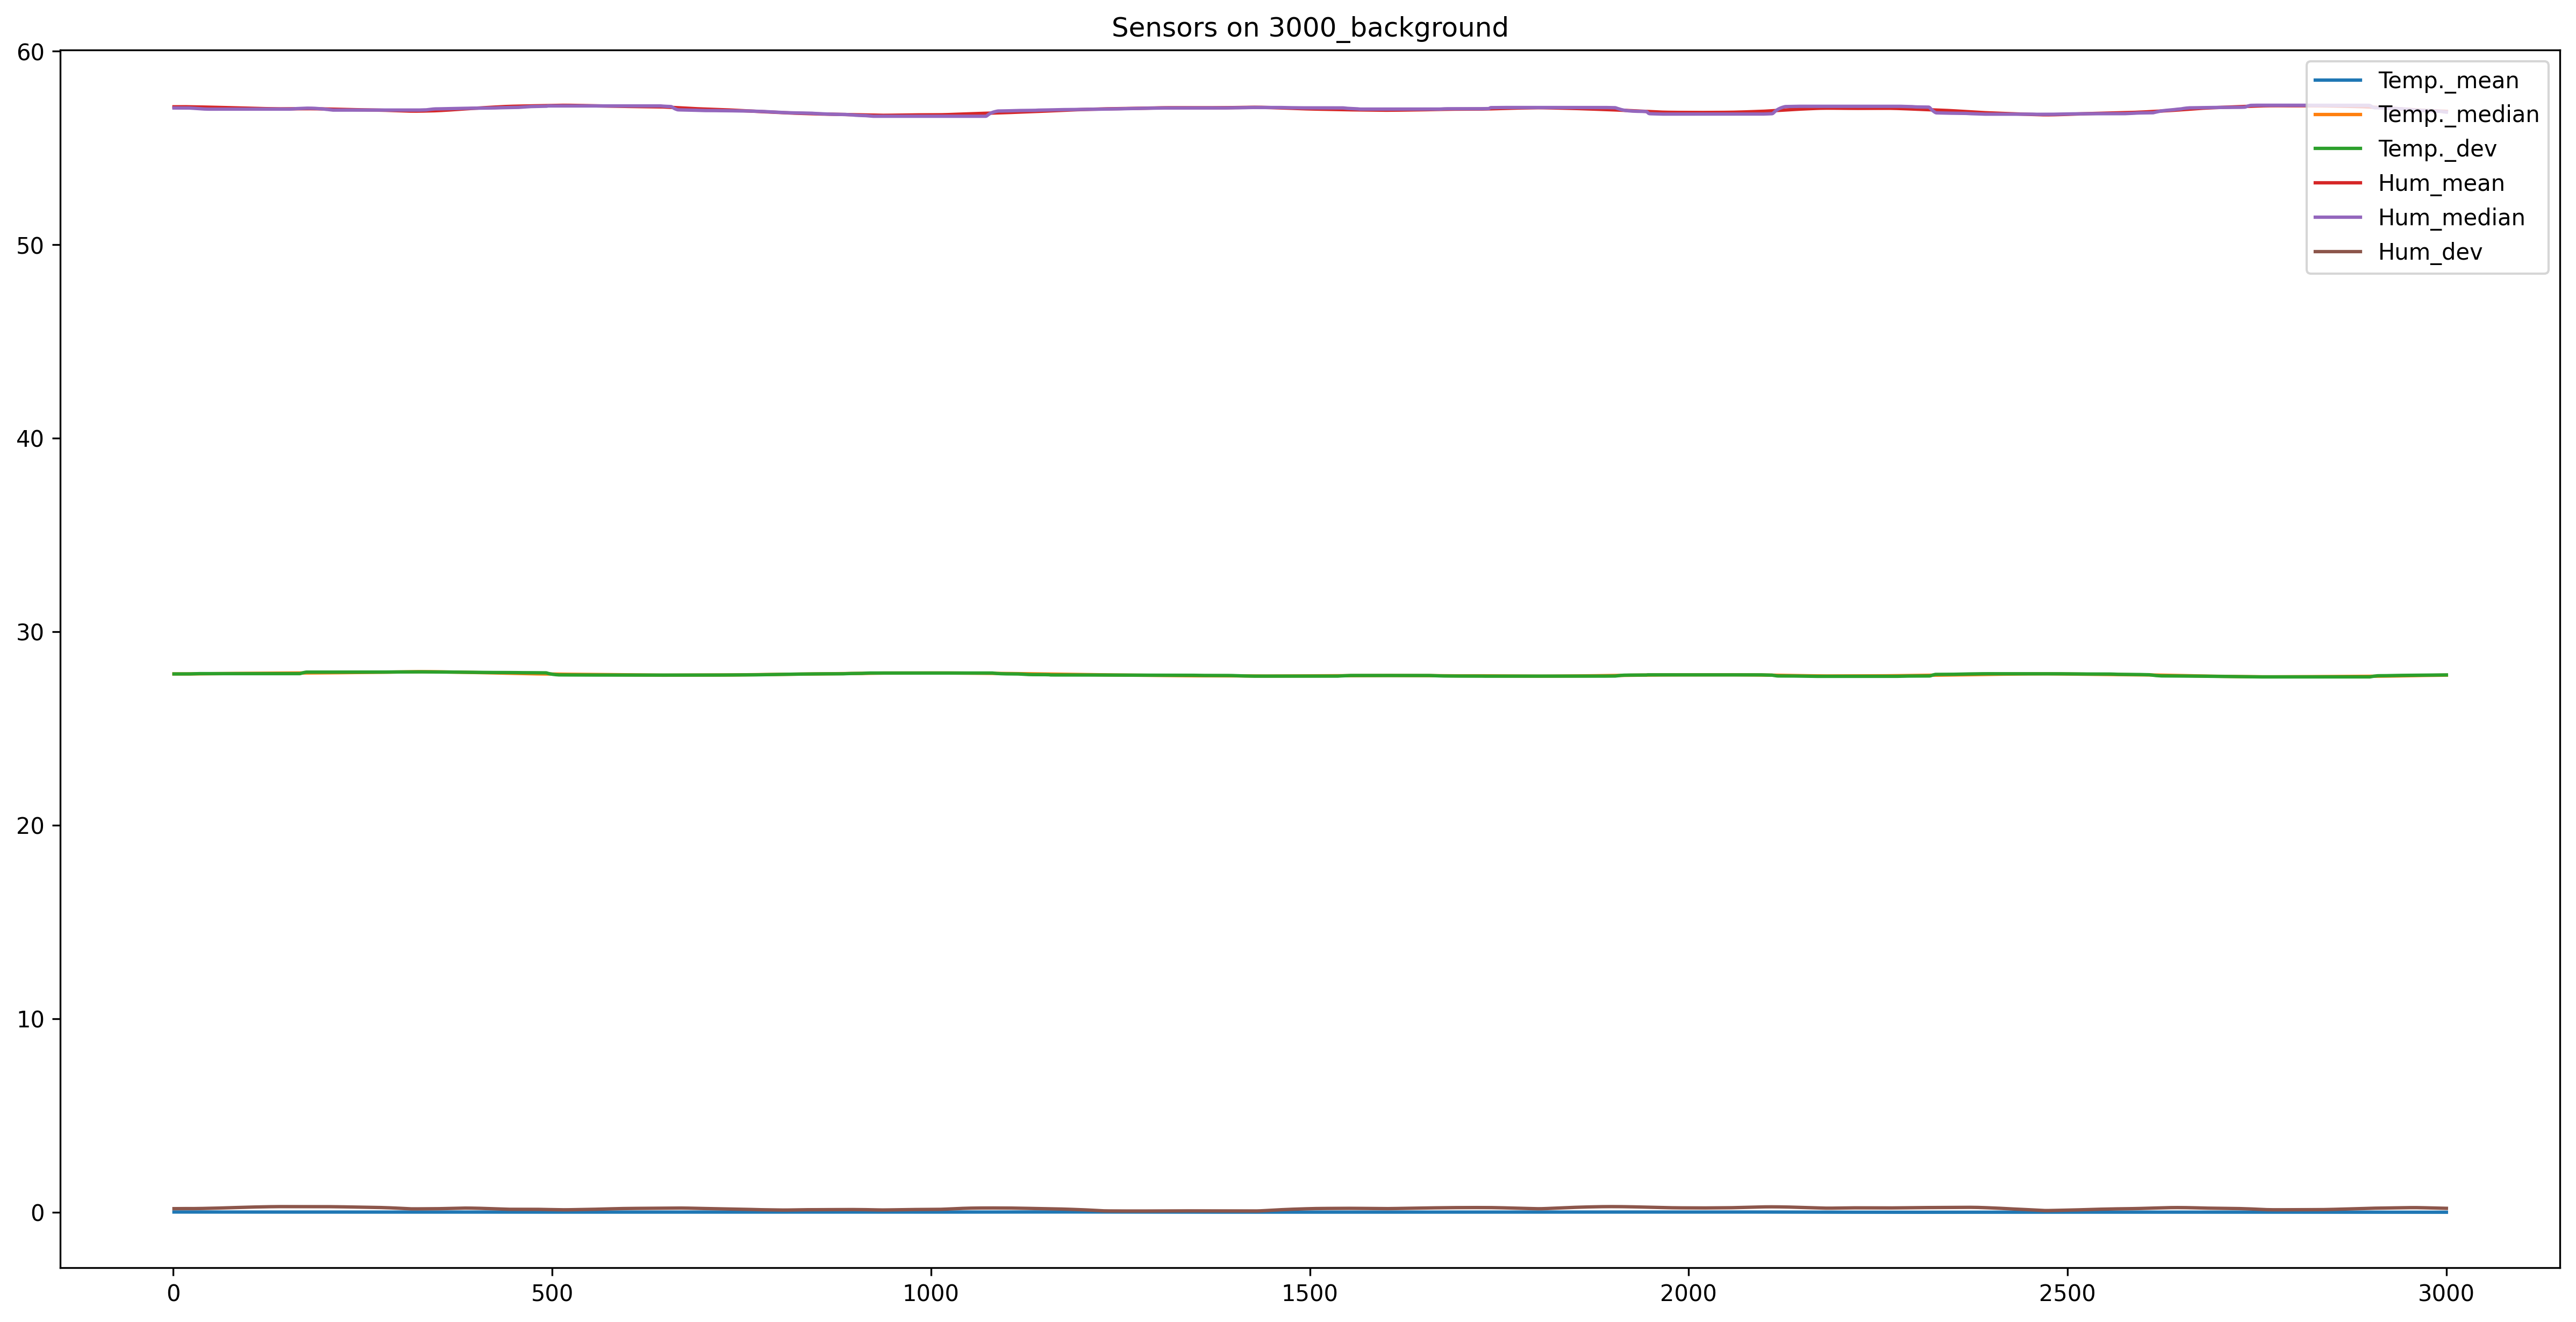

<Figure size 6000x3000 with 0 Axes>

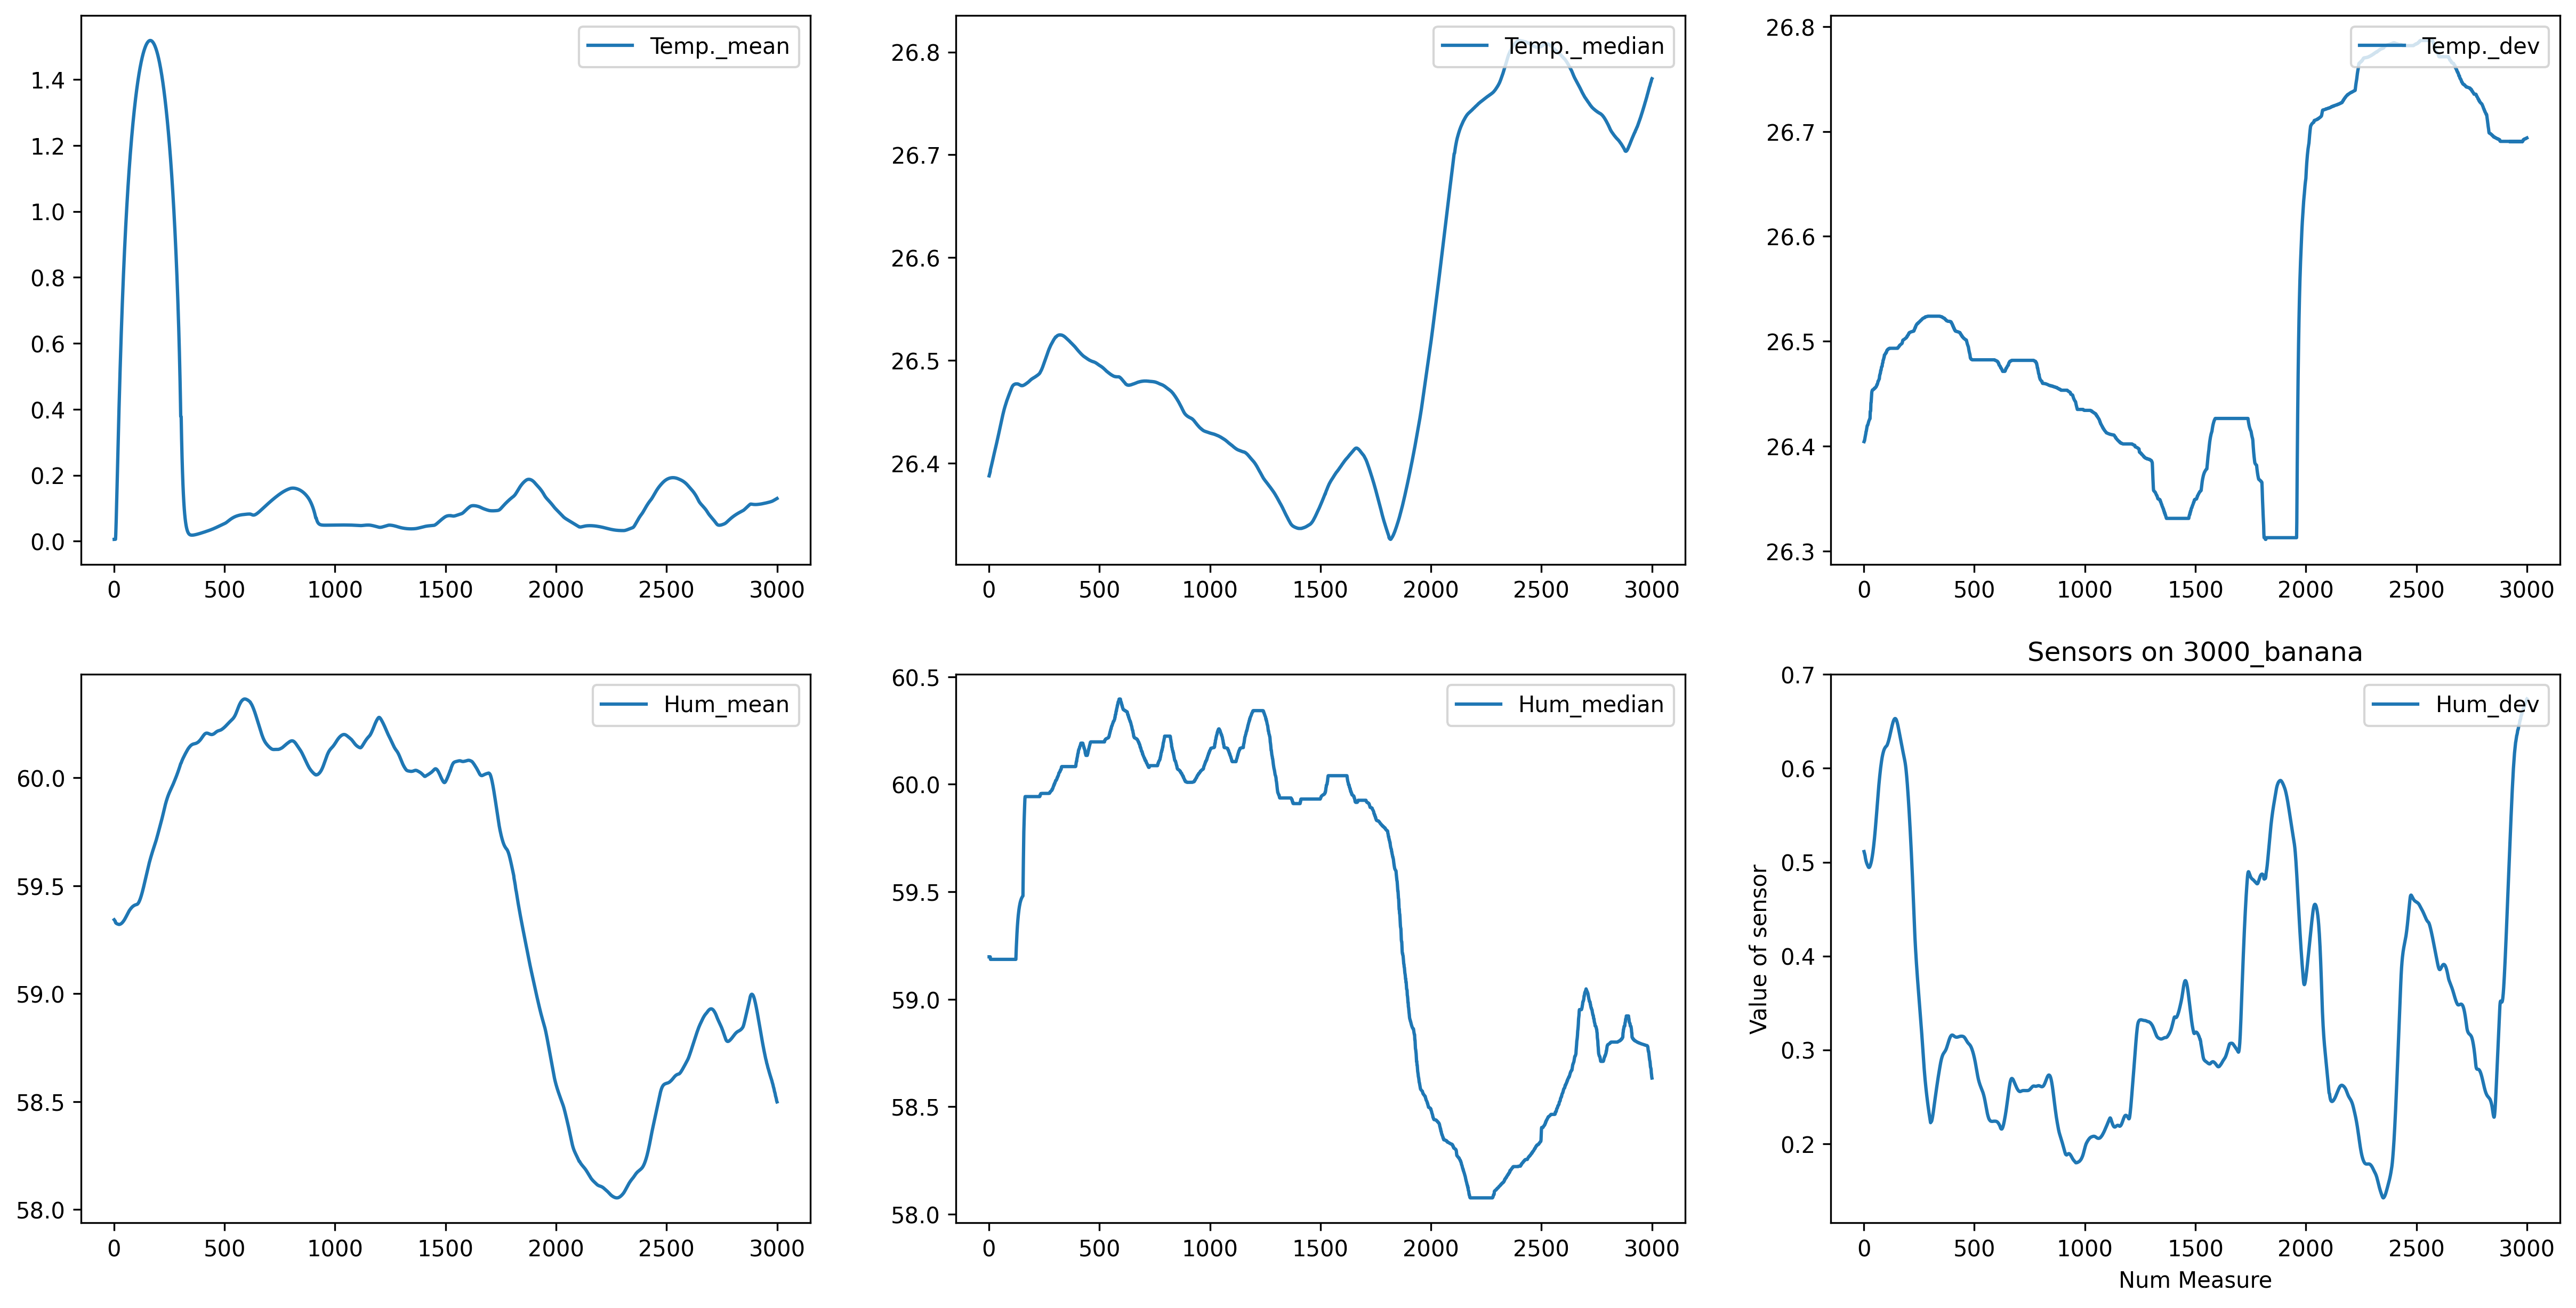

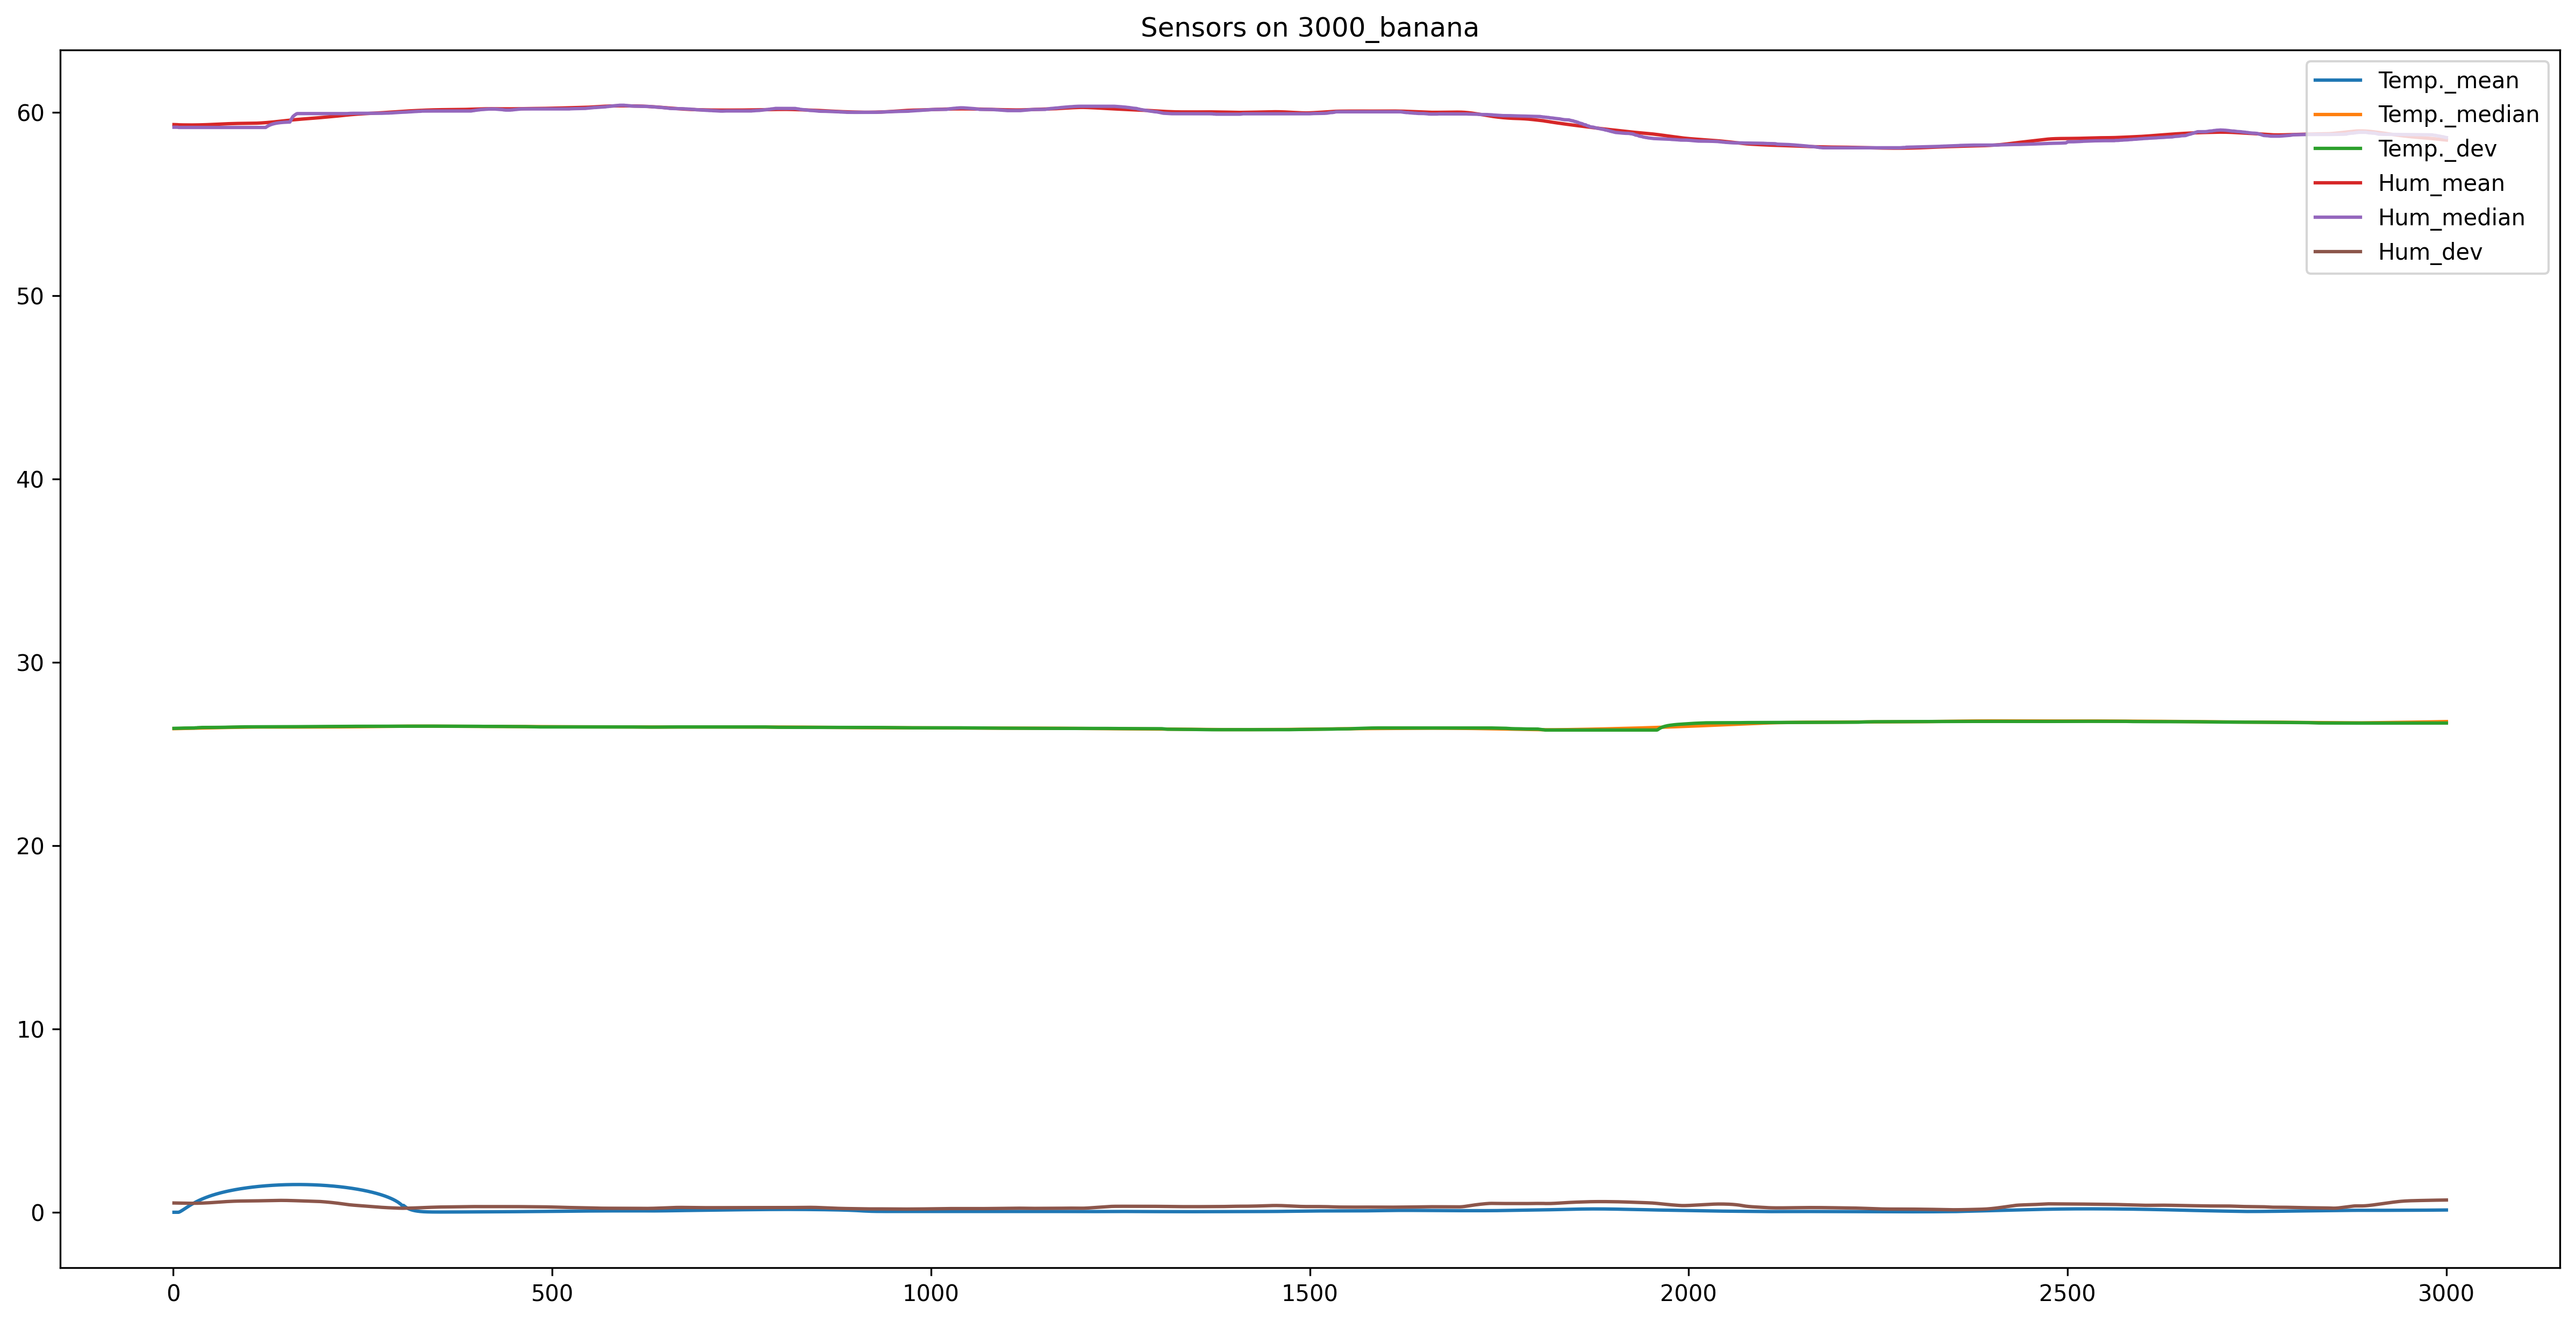

<Figure size 6000x3000 with 0 Axes>

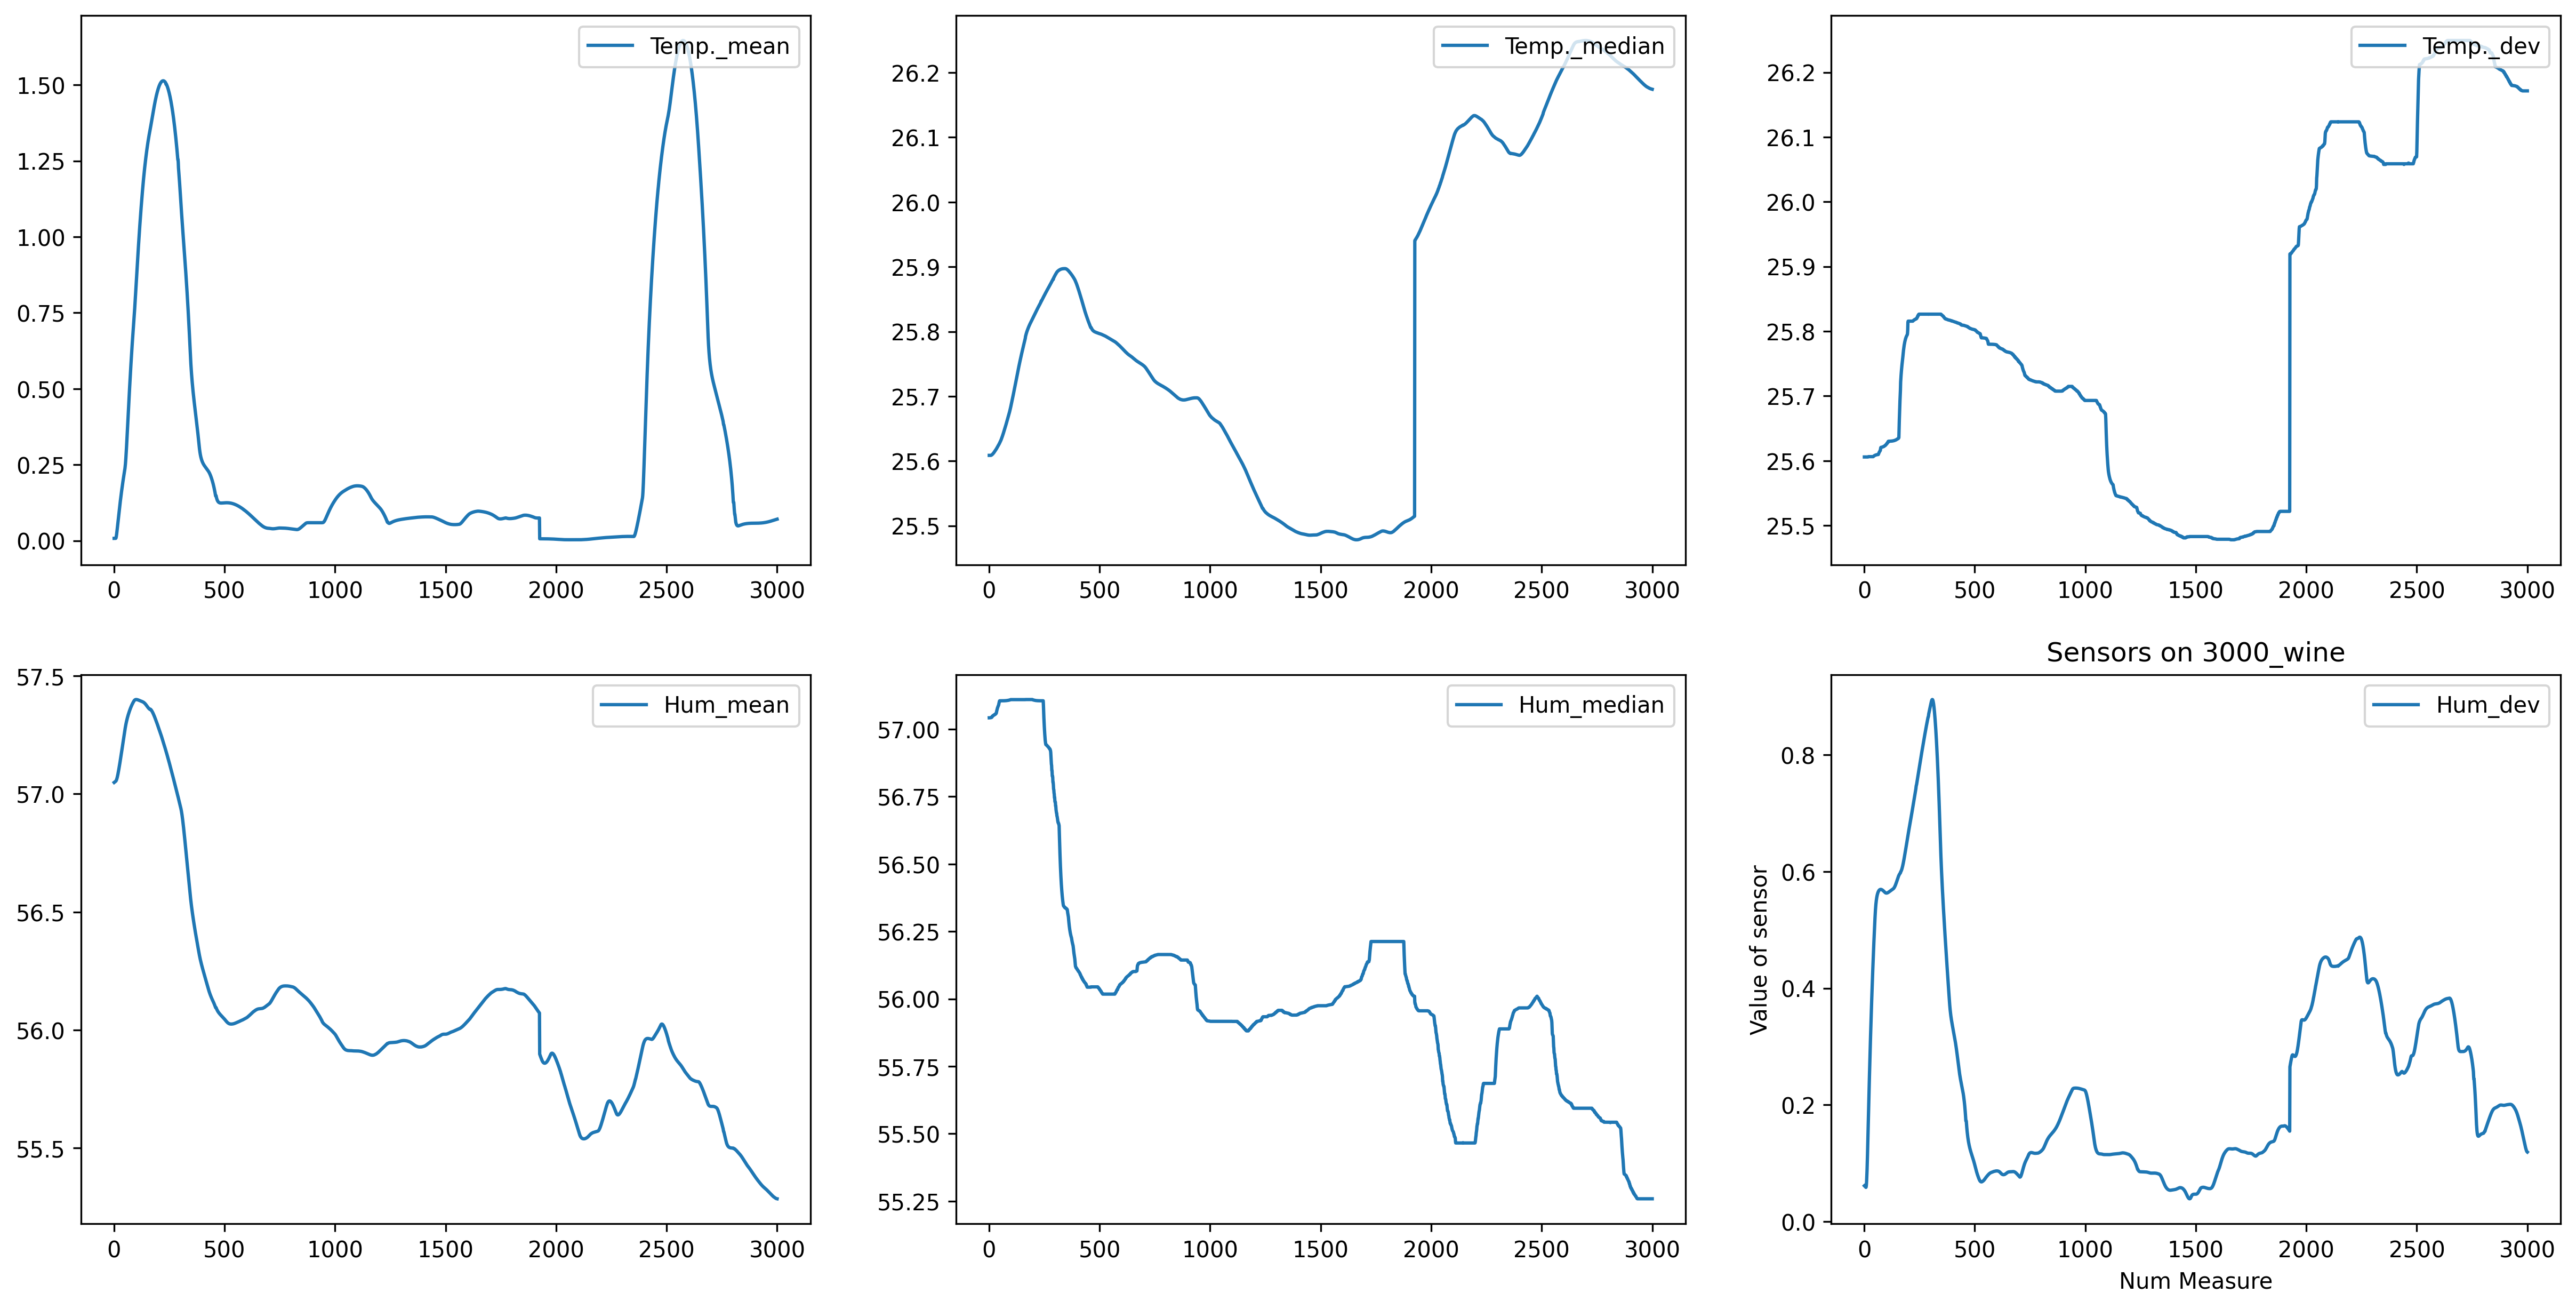

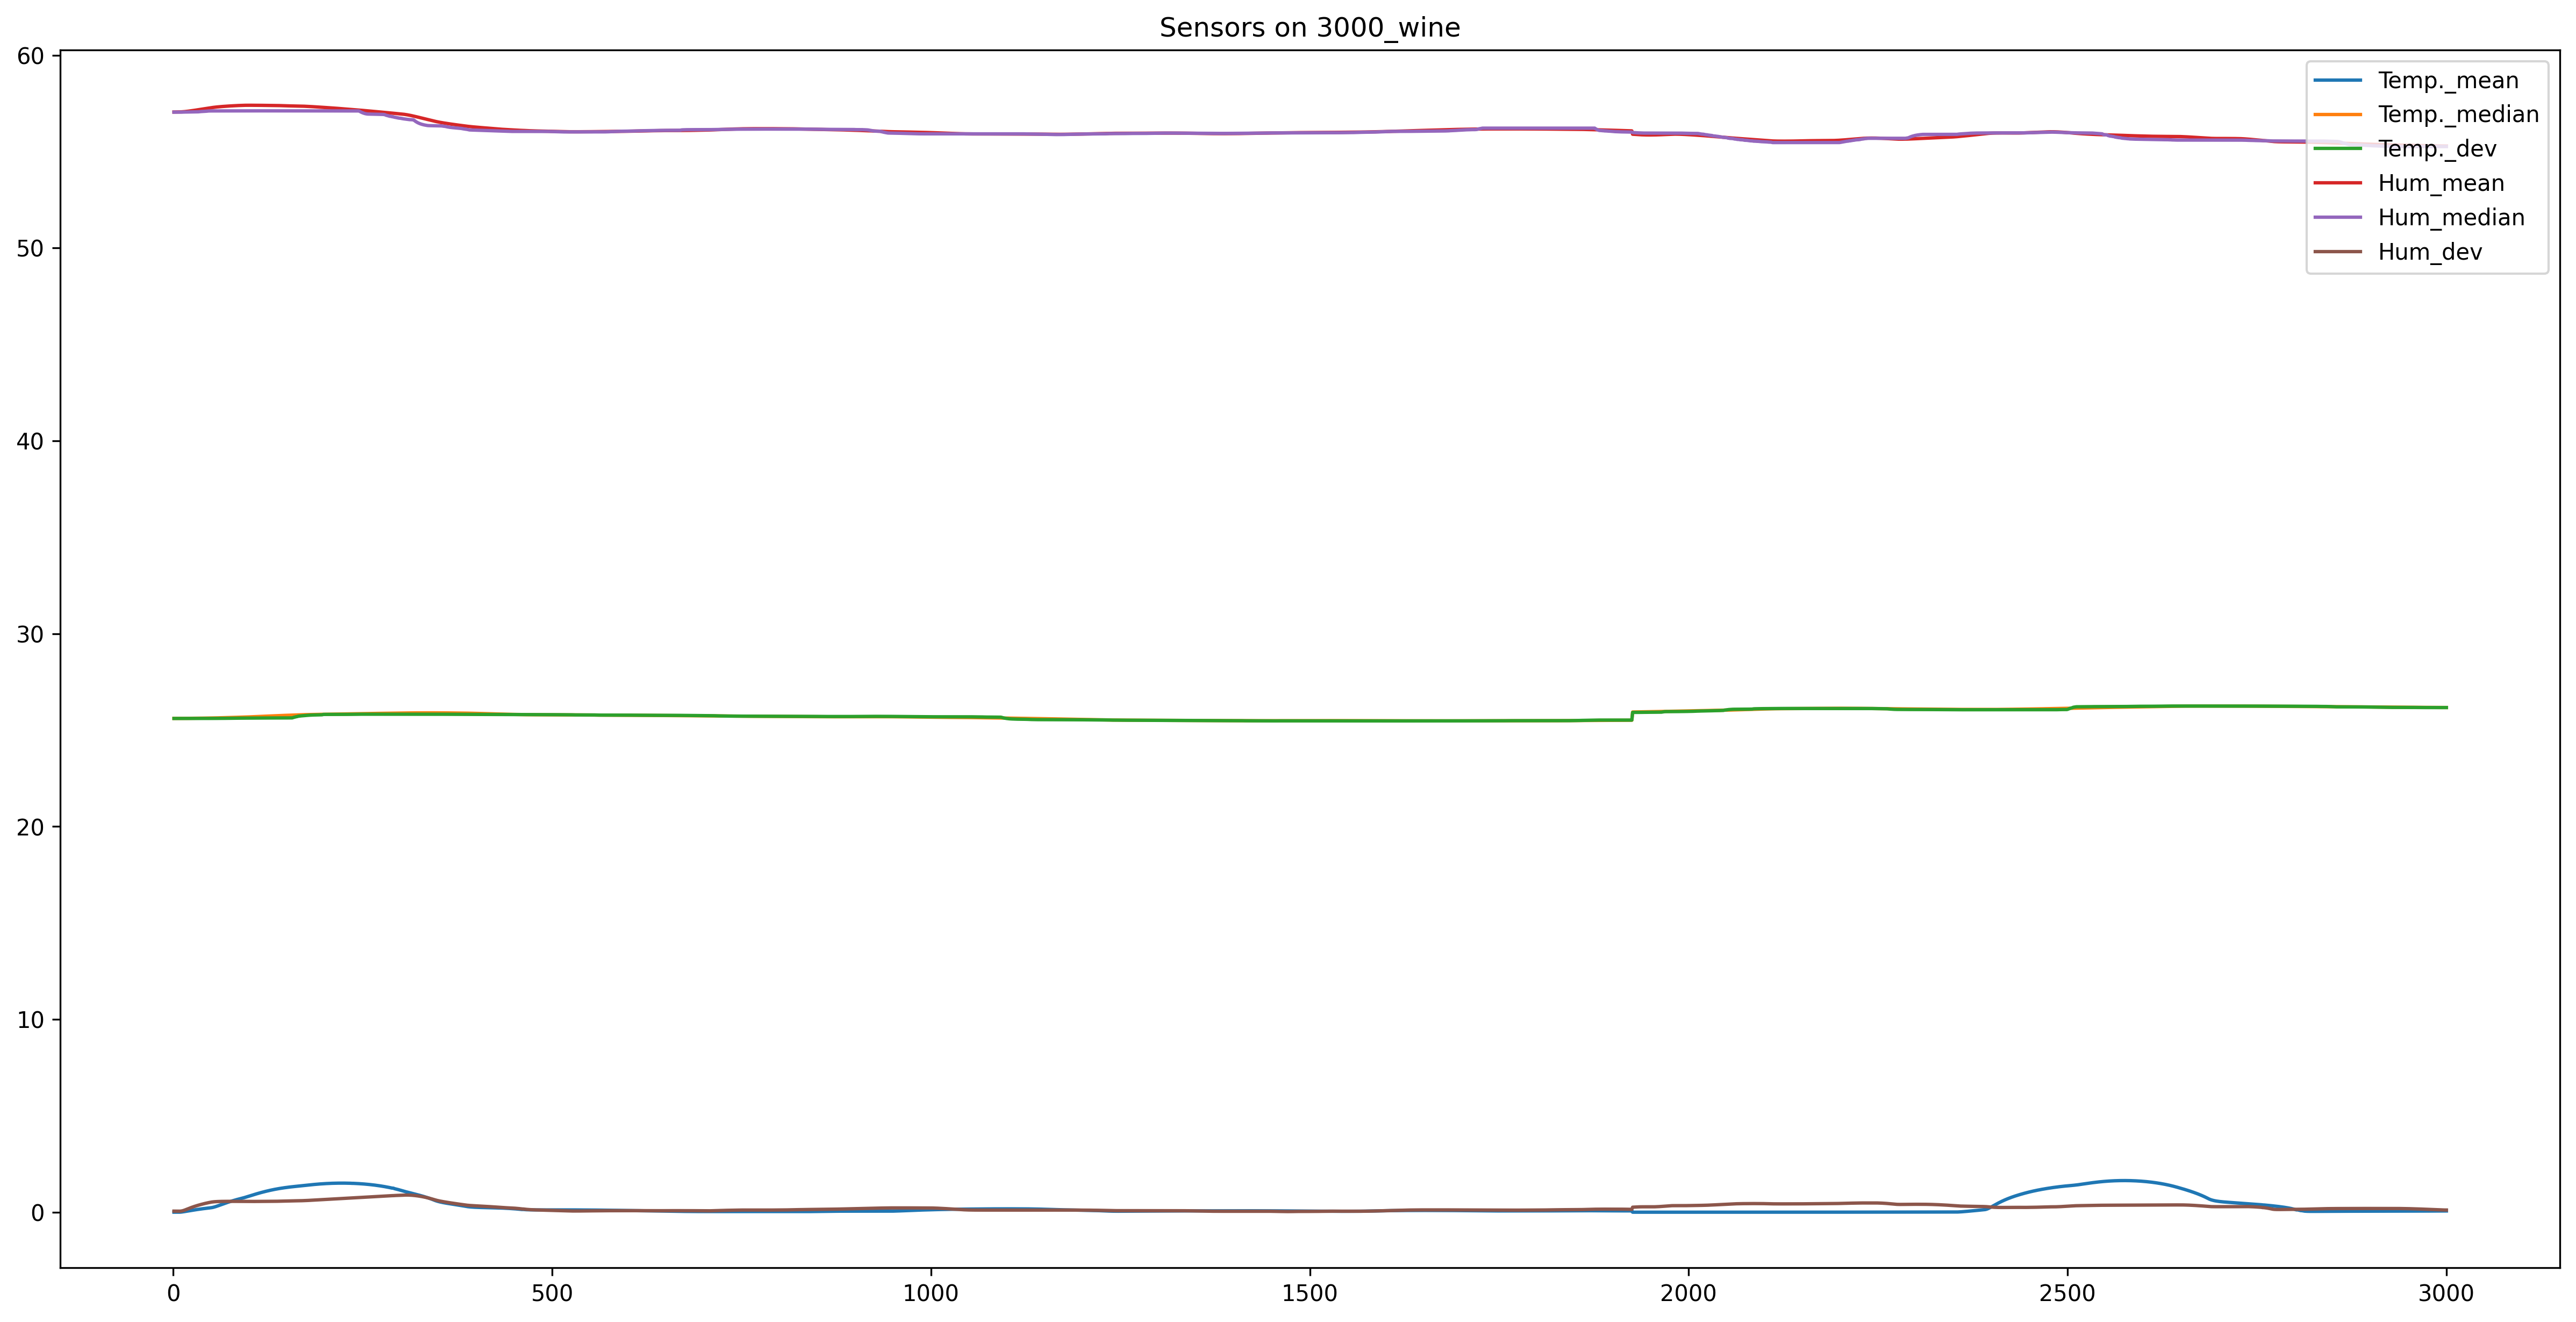

In [114]:
import os
class_column = df.iloc[:,-1] #obtenemos la columna de los valores
class_set = sorted(set(class_column)) #las hipótesis posibles
n_test = 3000
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 300
#obtengo el nombre y número de sesnores salvo los anteriores (buscamos temperatura y humedad)
#sensors = [each for each in df.columns.values if each[0]!="R" and each!="class" and not "_" in each]
sensors=["Temp.", "Hum"]
#obtengo las medidas obtenidas a cada sensor
medidas = [each[len(sensors[0]):] for each in df.columns if sensors[0] in each and each!=sensors[0]]

print(medidas)
print(sensors)
#si no existe la carpeta de imágenes la creo
if not os.path.exists("images"):
    os.makedirs("images")

for value in class_set: #para cada uno de ellos mostramos una gráfica
    #inicializamos las distintas x
    y=[]
    for i in range(len(sensors)):
        y.append([])
        for j in range(len(medidas)):
            y[i].append([])
    x = list(range(1, n_test+1))
    rows = df.loc[df["class"]==value][:n_test]
    #para cada una de las medidas de test
    #obtenemos los datos de cada sensor
    for index in range(n_test):
        #para cada uno de los sensores obtenemos los valores de sus medidas
        for i_s, sensor in enumerate(sensors):
            #para cada una de las medidas
            for i_m, medida in enumerate(medidas):
                aux = sensor+medida
                y[i_s][i_m].append(rows.iloc[index][aux])
    figure, axis = plt.subplots(len(sensors), len(medidas))
    plt.xlabel("Num Measure")
    plt.ylabel("Value of sensor")

    for i_s, sensor in enumerate(sensors):
        for i_m, medida in enumerate(medidas):
            #esta figura es una cuadricula con las filas los sensores y columnas los valores de cada sensor
            plt.figure(1)
            axis[i_s][i_m].plot(x, y[i_s][i_m], label=sensor+medida)
            axis[i_s][i_m].legend(loc='upper right')
            plt.title("Sensor "  + sensor + " on " + str(n_test) + " measurements class " + value)

            plt.figure(2) #la figura 2 es combinar una fila
            plt.plot(x, y[i_s][i_m], label=sensor+medida)
            plt.title("Sensor "  + sensor + " on " + str(n_test) + " measurements class " + value)
            plt.legend()

            plt.figure(3) #la figura 3 es combinar filas y columnas
            plt.plot(x, y[i_s][i_m], label=sensor+medida)

            plt.legend()
        #si no existe la carpeta de imágenes para ese valor, lo creo
        if not os.path.exists("images/" + value):
            os.makedirs("images/" + value)

        plt.figure(2).savefig('images/' + value + "/" + sensor + "_" + str(n_test) + ".jpg") #guardamos los valores de la figura 2 y borramos
        plt.clf()


    #plt.savefig('images/' + value + "/" + sensor + "_" + str(n_test) + ".jpg")
    plt.figure(1).savefig('images/' + value + "/AllSensorsSeparated.jpg")
    plt.title("Sensors on " + str(n_test) +"_"+ value)

    plt.figure(3).savefig('images/' + value + "/AllSensorsCombined.jpg")
    plt.title("Sensors on " + str(n_test) +"_"+ value)
    #plt.savefig('images/' + value + "/sensors_" + str(n_test) +"_"+ value + ".jpg")
    
    plt.show()
    
